# **ENTREGA 2 PROYECTO**
> * Noviembre 11-2023
> * Procesamiento de Datos
> * Pontificia Universidad Javeriana
> * Cristian Amado, Juan Rivera y Victoria Chavarro

#Carga de librerías

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carga de los datos

Debido a el peso de los documentos de hace uso de la herramienta *gdown*, lo cual hace que sea muhco más fácil manejar estos documentos desde la nube sin generar complejidad de aceeso a alguna cuenta para poder llegar a este

In [ ]:
!gdown 1zZver-mc6DNQb2dAtdALtyRuV9kEPOdo

Downloading...
From: https://drive.google.com/uc?id=1zZver-mc6DNQb2dAtdALtyRuV9kEPOdo
To: /content/2016_-_2017_Health_Education_Report.csv
100% 39.0k/39.0k [00:00<00:00, 73.4MB/s]


In [ ]:
!gdown 1EVMMYooFMjwXOX1fazEiDpwVkUHlGY5f

Downloading...
From: https://drive.google.com/uc?id=1EVMMYooFMjwXOX1fazEiDpwVkUHlGY5f
To: /content/Motor_Vehicle_Collisions_-_Vehicles.csv
100% 647M/647M [00:02<00:00, 258MB/s]


In [ ]:
!gdown 1mkVxG33f1omSPPfR1JiMO5WLcMuNhldJ

Downloading...
From: https://drive.google.com/uc?id=1mkVxG33f1omSPPfR1JiMO5WLcMuNhldJ
To: /content/NYCgov_Poverty_Measure_Data__2018_.csv
100% 13.8M/13.8M [00:00<00:00, 176MB/s]


In [ ]:
!gdown 1tut9sQeg-MimBF76NiNbmluCInR2asZU

Downloading...
From: https://drive.google.com/uc?id=1tut9sQeg-MimBF76NiNbmluCInR2asZU
To: /content/NYPD_Arrest_Data__Year_to_Date_.csv
100% 20.6M/20.6M [00:00<00:00, 208MB/s]


In [ ]:
# Cargar el archivo CSV en un DataFrame
df1 = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')

# Primeras filas del DataFrame
df1.head()

ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   261249590  01/02/2023  339.0  LARCENY,PETIT FROM OPEN AREAS,  341.0   
1   261271301  01/03/2023  105.0               STRANGULATION 1ST  106.0   
2   262235280  01/20/2023  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
3   264404265  03/01/2023  101.0                       ASSAULT 3  344.0   
4   264443630  03/02/2023  808.0                         TAX LAW  125.0   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   PETIT LARCENY  PL 1552500          M           M   
1                  FELONY ASSAULT  PL 1211200          F           S   
2                  FELONY ASSAULT  PL 1200501          F           K   
3    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           S   
4  OTHER STATE LAWS (NON PENAL LA  TAX181400A          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  \
0                6                  0     25-44        M     BLACK   
1              120                  0     25-44        M     WHITE   
2               62                  0     45-64        M     WHITE   
3              120                  0       <18        F     BLACK   
4               83                  0     25-44        F     WHITE   

   X_COORD_CD  Y_COORD_CD   Latitude  Longitude      New Georeferenced Column  
0      982745      206647  40.733876 -74.005428  POINT (-74.005428 40.733876)  
1      962808      174275  40.644996 -74.077263  POINT (-74.077263 40.644996)  
2      983289      158770  40.602464 -74.003460   POINT (-74.00346 40.602464)  
3      958743      173302  40.642316 -74.091908  POINT (-74.091908 40.642316)  
4     1006097      195371  40.702901 -73.921203  POINT (-73.921203 40.702901)

In [ ]:
# Cargar el archivo CSV en un DataFrame
df2 = pd.read_csv('NYCgov_Poverty_Measure_Data__2018_.csv')

# Primeras filas del DataFrame
df2.head()

SERIALNO  SPORDER  PWGTP  WGTP  AGEP  CIT  REL  SCH  SCHG  SCHL  ...  \
0         1        1     95    95    31    1    0    1     0  22.0  ...   
1        16        1    181   181    63    1    0    1     0  22.0  ...   
2        16        2    210   181    65    1    1    1     0  19.0  ...   
3        47        1     62    62    68    4    0    1     0   1.0  ...   
4        47        2     71    62    63    4    1    1     0   1.0  ...   

   Povunit_ID  Povunit_Rel  PreTaxIncome_PU  RETP_adj  RNTP_adj  SEMP_adj  \
0           1            1        127650.22       0.0       0.0       0.0   
1           1            1        346479.19       0.0       0.0       0.0   
2           1            2        346479.19       0.0       0.0       0.0   
3           1            1        155003.84       0.0       0.0       0.0   
4           1            2        155003.84       0.0       0.0       0.0   

   SSIP_adj    SSP_adj  TotalWorkHrs_PU    WAGP_adj  
0       0.0      0.000                2  127650.220  
1       0.0      0.000                2  182357.450  
2       0.0  12157.164                2       0.000  
3       0.0  27353.619                1   91178.727  
4       0.0      0.000                1   36471.492  

[5 rows x 61 columns]

In [ ]:
# Cargar el archivo CSV en un DataFrame
df3 = pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles.csv')

# Por ejemplo, puedes imprimir las primeras filas del DataFrame
df3.head()

<ipython-input-8-6569b8303315>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles.csv')


UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0   10385780        100201  09/07/2012       9:03   
1   19140702       4213082  09/23/2019       8:15   
2   14887647       3307608  10/02/2015      17:18   
3   14889754       3308693  10/04/2015      20:34   
4   14400270        297666  04/25/2013      21:15   

                             VEHICLE_ID STATE_REGISTRATION  \
0                                     1                 NY   
1  0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
2                                     2                 NY   
3                                     1                 NY   
4                                     1                 NY   

                          VEHICLE_TYPE   VEHICLE_MAKE VEHICLE_MODEL  \
0                    PASSENGER VEHICLE            NaN           NaN   
1  Station Wagon/Sport Utility Vehicle  TOYT -CAR/SUV           NaN   
2                                 TAXI            NaN           NaN   
3                    PASSENGER VEHICLE            NaN           NaN   
4                    PASSENGER VEHICLE            NaN           NaN   

   VEHICLE_YEAR  ...             PRE_CRASH    POINT_OF_IMPACT  \
0           NaN  ...                   NaN                NaN   
1        2002.0  ...  Going Straight Ahead  Left Front Bumper   
2           NaN  ...  Going Straight Ahead                NaN   
3           NaN  ...                Parked                NaN   
4           NaN  ...                   NaN                NaN   

             VEHICLE_DAMAGE VEHICLE_DAMAGE_1 VEHICLE_DAMAGE_2  \
0                       NaN              NaN              NaN   
1  Left Front Quarter Panel              NaN              NaN   
2                       NaN              NaN              NaN   
3                       NaN              NaN              NaN   
4                       NaN              NaN              NaN   

  VEHICLE_DAMAGE_3 PUBLIC_PROPERTY_DAMAGE PUBLIC_PROPERTY_DAMAGE_TYPE  \
0              NaN                    NaN                         NaN   
1              NaN                      N                         NaN   
2              NaN                    NaN                         NaN   
3              NaN                    NaN                         NaN   
4              NaN                    NaN                         NaN   

            CONTRIBUTING_FACTOR_1 CONTRIBUTING_FACTOR_2  
0                     Unspecified                   NaN  
1  Driver Inattention/Distraction           Unspecified  
2  Driver Inattention/Distraction                   NaN  
3                     Unspecified                   NaN  
4                 Other Vehicular                   NaN  

[5 rows x 25 columns]

<ipython-input-57-6569b8303315>:2: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0   10385780        100201  09/07/2012       9:03   
1   19140702       4213082  09/23/2019       8:15   
2   14887647       3307608  10/02/2015      17:18   
3   14889754       3308693  10/04/2015      20:34   
4   14400270        297666  04/25/2013      21:15   

                             VEHICLE_ID STATE_REGISTRATION  \
0                                     1                 NY   
1  0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
2                                     2                 NY   
3                                     1                 NY   
4                                     1                 NY   

                          VEHICLE_TYPE   VEHICLE_MAKE VEHICLE_MODEL  \
0                    PASSENGER VEHICLE            NaN           NaN   
1  Station Wagon/Sport Utility Vehicle  TOYT -CAR/SUV           NaN   
2                                 TAXI            NaN           NaN   
3                    PASSENGER VEHICLE            NaN           NaN   
4                    PASSENGER VEHICLE            NaN           NaN   

   VEHICLE_YEAR  ...             PRE_CRASH    POINT_OF_IMPACT  \
0           NaN  ...                   NaN                NaN   
1        2002.0  ...  Going Straight Ahead  Left Front Bumper   
2           NaN  ...  Going Straight Ahead                NaN   
3           NaN  ...                Parked                NaN   
4           NaN  ...                   NaN                NaN   

             VEHICLE_DAMAGE VEHICLE_DAMAGE_1 VEHICLE_DAMAGE_2  \
0                       NaN              NaN              NaN   
1  Left Front Quarter Panel              NaN              NaN   
2                       NaN              NaN              NaN   
3                       NaN              NaN              NaN   
4                       NaN              NaN              NaN   

  VEHICLE_DAMAGE_3 PUBLIC_PROPERTY_DAMAGE PUBLIC_PROPERTY_DAMAGE_TYPE  \
0              NaN                    NaN                         NaN   
1              NaN                      N                         NaN   
2              NaN                    NaN                         NaN   
3              NaN                    NaN                         NaN   
4              NaN                    NaN                         NaN   

            CONTRIBUTING_FACTOR_1 CONTRIBUTING_FACTOR_2  
0                     Unspecified                   NaN  
1  Driver Inattention/Distraction           Unspecified  
2  Driver Inattention/Distraction                   NaN  
3                     Unspecified                   NaN  
4                 Other Vehicular                   NaN  

[5 rows x 25 columns]

In [ ]:
# Cargar el archivo CSV en un DataFrame
df4 = pd.read_csv('2016_-_2017_Health_Education_Report.csv')

# Primeras filas del DataFrame
df4.head()

School DBN  Community School District  City Council District  \
0     02M394                          2                      1   
1     02M551                          2                      1   
2     02M294                          2                      1   
3     01M458                          1                      1   
4     02M280                          2                      1   

                                      School Name  \
0                        Emma Lazarus High School   
1           Urban Assembly New York Harbor School   
2                            Essex Street Academy   
3                       Forsyth Satellite Academy   
4  Manhattan Early College School for Advertising   

   # of students in grades 9-12  \
0                           306   
1                           433   
2                           328   
3                           161   
4                           267   

  # of students in grades 9-12 scheduled for at least one semester of health instruction  \
0                                                218                                       
1                                                419                                       
2                                                239                                       
3                                                144                                       
4                                                103                                       

       % # of 16-17 June and August graduates  \
0  71.2%                                   33   
1  96.8%                                   70   
2  72.9%                                   69   
3  89.4%                                    s   
4  38.6%                                    s   

  # of 16-17 June and August graduates meeting high school health requirements  \
0                                                 33                             
1                                                 70                             
2                                                 69                             
3                                                  s                             
4                                                  s                             

      % 1  
0  100.0%  
1  100.0%  
2  100.0%  
3       s  
4       s

School DBN  Community School District  City Council District  \
0     02M394                          2                      1   
1     02M551                          2                      1   
2     02M294                          2                      1   
3     01M458                          1                      1   
4     02M280                          2                      1   

                                      School Name  \
0                        Emma Lazarus High School   
1           Urban Assembly New York Harbor School   
2                            Essex Street Academy   
3                       Forsyth Satellite Academy   
4  Manhattan Early College School for Advertising   

   # of students in grades 9-12  \
0                           306   
1                           433   
2                           328   
3                           161   
4                           267   

  # of students in grades 9-12 scheduled for at least one semester of health instruction  \
0                                                218                                       
1                                                419                                       
2                                                239                                       
3                                                144                                       
4                                                103                                       

       % # of 16-17 June and August graduates  \
0  71.2%                                   33   
1  96.8%                                   70   
2  72.9%                                   69   
3  89.4%                                    s   
4  38.6%                                    s   

  # of 16-17 June and August graduates meeting high school health requirements  \
0                                                 33                             
1                                                 70                             
2                                                 69                             
3                                                  s                             
4                                                  s                             

      % 1  
0  100.0%  
1  100.0%  
2  100.0%  
3       s  
4       s

# Análisis exploratorio y filtros

## Dataset 1 ~ Arrestos NY

In [ ]:
import pandas as pd

# Filtrar los registros donde OFNS_DESC es '(null)' y obtener los valores únicos de LAW_CODE
filtered_df = df1[df1['OFNS_DESC'] == '(null)']
unique_law_codes = filtered_df['LAW_CODE'].unique()

# Crear un DataFrame con los resultados
df_law_codes = pd.DataFrame({'LAW_CODE': unique_law_codes})

# Mostrar los resultados
df_law_codes.head(10)

LAW_CODE
0  PL 215401B
1  PL 2410200
2  CPL5700600
3  PL 2223000
4  RPA0076801
5  PL 2224000
6  PL 2223500
7  PL 1251401
8  PL 2225500
9  PL 2650110

LAW_CODE
0  PL 215401B
1  PL 2410200
2  CPL5700600
3  PL 2223000
4  RPA0076801
5  PL 2224000
6  PL 2223500
7  PL 1251401
8  PL 2225500
9  PL 2650110

In [ ]:
import pandas as pd

# Copia del DataFrame original
df_copy = df1.copy()

# Mapeo de categorías
category_mapping = {
    "VTL04020BI": "",
    "VTL119204T": "",
    "RPA0076801": "Desconocido",
    "PL 2650700": "Porte de arma sin serialización",
    "PL 265019I": "Desconocido",
    "PL 2650110": "Desconocido",
    "PL 241051F": "",
    "PL 2410202": "",
    "PL 2410200": "",
    "PL 2225500": "",
    "PL 2224000": "",
    "PL 2223500": "",
    "PL 2223000": "",
    "CPL5700600": "Nuevo Valor para CPL5700600",
    "PL 215401B": "Nuevo Valor para PL 215401B",
    "PL 1251401": "Nuevo Valor para PL 1251401"
}

# Aplicar el mapeo en el DataFrame de pandas
df_copy['OFNS_DESC'] = df_copy['LAW_CODE'].map(category_mapping).fillna(df_copy['OFNS_DESC'])

# Mostrar los resultados
df_copy.head()

ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   261249590  01/02/2023  339.0  LARCENY,PETIT FROM OPEN AREAS,  341.0   
1   261271301  01/03/2023  105.0               STRANGULATION 1ST  106.0   
2   262235280  01/20/2023  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
3   264404265  03/01/2023  101.0                       ASSAULT 3  344.0   
4   264443630  03/02/2023  808.0                         TAX LAW  125.0   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   PETIT LARCENY  PL 1552500          M           M   
1                  FELONY ASSAULT  PL 1211200          F           S   
2                  FELONY ASSAULT  PL 1200501          F           K   
3    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           S   
4  OTHER STATE LAWS (NON PENAL LA  TAX181400A          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  \
0                6                  0     25-44        M     BLACK   
1              120                  0     25-44        M     WHITE   
2               62                  0     45-64        M     WHITE   
3              120                  0       <18        F     BLACK   
4               83                  0     25-44        F     WHITE   

   X_COORD_CD  Y_COORD_CD   Latitude  Longitude      New Georeferenced Column  
0      982745      206647  40.733876 -74.005428  POINT (-74.005428 40.733876)  
1      962808      174275  40.644996 -74.077263  POINT (-74.077263 40.644996)  
2      983289      158770  40.602464 -74.003460   POINT (-74.00346 40.602464)  
3      958743      173302  40.642316 -74.091908  POINT (-74.091908 40.642316)  
4     1006097      195371  40.702901 -73.921203  POINT (-73.921203 40.702901)

ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   261249590  01/02/2023  339.0  LARCENY,PETIT FROM OPEN AREAS,  341.0   
1   261271301  01/03/2023  105.0               STRANGULATION 1ST  106.0   
2   262235280  01/20/2023  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
3   264404265  03/01/2023  101.0                       ASSAULT 3  344.0   
4   264443630  03/02/2023  808.0                         TAX LAW  125.0   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   PETIT LARCENY  PL 1552500          M           M   
1                  FELONY ASSAULT  PL 1211200          F           S   
2                  FELONY ASSAULT  PL 1200501          F           K   
3    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           S   
4  OTHER STATE LAWS (NON PENAL LA  TAX181400A          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  \
0                6                  0     25-44        M     BLACK   
1              120                  0     25-44        M     WHITE   
2               62                  0     45-64        M     WHITE   
3              120                  0       <18        F     BLACK   
4               83                  0     25-44        F     WHITE   

   X_COORD_CD  Y_COORD_CD   Latitude  Longitude      New Georeferenced Column  
0      982745      206647  40.733876 -74.005428  POINT (-74.005428 40.733876)  
1      962808      174275  40.644996 -74.077263  POINT (-74.077263 40.644996)  
2      983289      158770  40.602464 -74.003460   POINT (-74.00346 40.602464)  
3      958743      173302  40.642316 -74.091908  POINT (-74.091908 40.642316)  
4     1006097      195371  40.702901 -73.921203  POINT (-73.921203 40.702901)

In [ ]:
# Copia del DataFrame original
df_copy = df1.copy()

# Reemplazar valores nulos en la columna "LAW_CODE" con "(null)"
df_copy['LAW_CODE'] = df_copy['LAW_CODE'].fillna("(null)")

# Mostrar la columna resultante
df_copy[['LAW_CODE']]

LAW_CODE
0       PL 1552500
1       PL 1211200
2       PL 1200501
3       PL 1200001
4       TAX181400A
...            ...
112566  VTL05110MU
112567  PL 1200001
112568  PL 1601502
112569  PL 1654502
112570  PL 1553001

[112571 rows x 1 columns]

LAW_CODE
0       PL 1552500
1       PL 1211200
2       PL 1200501
3       PL 1200001
4       TAX181400A
...            ...
112566  VTL05110MU
112567  PL 1200001
112568  PL 1601502
112569  PL 1654502
112570  PL 1553001

[112571 rows x 1 columns]

In [ ]:
# Imprime la cantidad de filas y columnas antes de la eliminación
print("Antes de la eliminación:", df1.shape)

# Eliminar filas con valores nulos en la columna "OFNS_DESC"
df1 = df1.dropna(subset=["OFNS_DESC"])

# Imprime la cantidad de filas y columnas después de la eliminación
print("Después de la eliminación:", df1.shape)

# Imprime la cantidad de filas eliminadas
filas_eliminadas = df1.shape[0] - df1.shape[0]
print("Número de filas eliminadas:", filas_eliminadas)

Antes de la eliminación: (112571, 19)
Después de la eliminación: (112571, 19)
Número de filas eliminadas: 0
Antes de la eliminación: (112571, 19)
Después de la eliminación: (112571, 19)
Número de filas eliminadas: 0


##Dataset 2 ~ Estadísticas de pobreza

In [ ]:
# Reemplaza "df2" con tu DataFrame real
conteo_nulos = df2.isnull().sum()

# Muestra el conteo de nulos
print(conteo_nulos)

SERIALNO           0
SPORDER            0
PWGTP              0
WGTP               0
AGEP               0
                  ..
SEMP_adj           0
SSIP_adj           0
SSP_adj            0
TotalWorkHrs_PU    0
WAGP_adj           0
Length: 61, dtype: int64
SERIALNO           0
SPORDER            0
PWGTP              0
WGTP               0
AGEP               0
                  ..
SEMP_adj           0
SSIP_adj           0
SSP_adj            0
TotalWorkHrs_PU    0
WAGP_adj           0
Length: 61, dtype: int64


In [ ]:
# Reemplaza "df2" con tu DataFrame real
df2.iloc[:, 0:68] = df2.iloc[:, 0:68].fillna(0)

# Muestra el DataFrame resultante
df2

SERIALNO  SPORDER  PWGTP  WGTP  AGEP  CIT  REL  SCH  SCHG  SCHL  ...  \
0             1        1     95    95    31    1    0    1     0  22.0  ...   
1            16        1    181   181    63    1    0    1     0  22.0  ...   
2            16        2    210   181    65    1    1    1     0  19.0  ...   
3            47        1     62    62    68    4    0    1     0   1.0  ...   
4            47        2     71    62    63    4    1    1     0   1.0  ...   
...         ...      ...    ...   ...   ...  ...  ...  ...   ...   ...  ...   
68268   1400922        2    129   113    38    1    1    1     0  22.0  ...   
68269   1400922        3    102   113     2    1    2    0     0   0.0  ...   
68270   1400927        1     93    93    27    1    0    1     0  21.0  ...   
68271   1400927        2     69    93    56    4    6    1     0  21.0  ...   
68272   1400927        3     80    93    54    5    6    1     0  21.0  ...   

       Povunit_ID  Povunit_Rel  PreTaxIncome_PU  RETP_adj   RNTP_adj  \
0               1            1       127650.220       0.0     0.0000   
1               1            1       346479.190       0.0     0.0000   
2               1            2       346479.190       0.0     0.0000   
3               1            1       155003.840       0.0     0.0000   
4               1            2       155003.840       0.0     0.0000   
...           ...          ...              ...       ...        ...   
68268           1            2       222881.340       0.0  1722.2649   
68269           1            3       222881.340       0.0  1722.2649   
68270           1            1        64838.207       0.0     0.0000   
68271           1            4        64838.207       0.0     0.0000   
68272           1            4        64838.207       0.0     0.0000   

       SEMP_adj  SSIP_adj    SSP_adj  TotalWorkHrs_PU    WAGP_adj  
0           0.0       0.0      0.000                2  127650.220  
1           0.0       0.0      0.000                2  182357.450  
2           0.0       0.0  12157.164                2       0.000  
3           0.0       0.0  27353.619                1   91178.727  
4           0.0       0.0      0.000                1   36471.492  
...         ...       ...        ...              ...         ...  
68268       0.0       0.0      0.000                1  131702.610  
68269       0.0       0.0      0.000                1       0.000  
68270       0.0       0.0      0.000                1   42550.074  
68271       0.0       0.0      0.000                1   22288.135  
68272       0.0       0.0      0.000                1       0.000  

[68273 rows x 61 columns]

SERIALNO  SPORDER  PWGTP  WGTP  AGEP  CIT  REL  SCH  SCHG  SCHL  ...  \
0             1        1     95    95    31    1    0    1     0  22.0  ...   
1            16        1    181   181    63    1    0    1     0  22.0  ...   
2            16        2    210   181    65    1    1    1     0  19.0  ...   
3            47        1     62    62    68    4    0    1     0   1.0  ...   
4            47        2     71    62    63    4    1    1     0   1.0  ...   
...         ...      ...    ...   ...   ...  ...  ...  ...   ...   ...  ...   
68268   1400922        2    129   113    38    1    1    1     0  22.0  ...   
68269   1400922        3    102   113     2    1    2    0     0   0.0  ...   
68270   1400927        1     93    93    27    1    0    1     0  21.0  ...   
68271   1400927        2     69    93    56    4    6    1     0  21.0  ...   
68272   1400927        3     80    93    54    5    6    1     0  21.0  ...   

       Povunit_ID  Povunit_Rel  PreTaxIncome_PU  RETP_adj   RNTP_adj  \
0               1            1       127650.220       0.0     0.0000   
1               1            1       346479.190       0.0     0.0000   
2               1            2       346479.190       0.0     0.0000   
3               1            1       155003.840       0.0     0.0000   
4               1            2       155003.840       0.0     0.0000   
...           ...          ...              ...       ...        ...   
68268           1            2       222881.340       0.0  1722.2649   
68269           1            3       222881.340       0.0  1722.2649   
68270           1            1        64838.207       0.0     0.0000   
68271           1            4        64838.207       0.0     0.0000   
68272           1            4        64838.207       0.0     0.0000   

       SEMP_adj  SSIP_adj    SSP_adj  TotalWorkHrs_PU    WAGP_adj  
0           0.0       0.0      0.000                2  127650.220  
1           0.0       0.0      0.000                2  182357.450  
2           0.0       0.0  12157.164                2       0.000  
3           0.0       0.0  27353.619                1   91178.727  
4           0.0       0.0      0.000                1   36471.492  
...         ...       ...        ...              ...         ...  
68268       0.0       0.0      0.000                1  131702.610  
68269       0.0       0.0      0.000                1       0.000  
68270       0.0       0.0      0.000                1   42550.074  
68271       0.0       0.0      0.000                1   22288.135  
68272       0.0       0.0      0.000                1       0.000  

[68273 rows x 61 columns]

# Respuesta a las preguntas planteadas

## Dataset 1 ~ Arrestos NY

###1. ¿Cuál es el género que se ve involucrado en la mayor cantidad de crímenes cometidos?

In [ ]:
df_filtered = df1[df1['PERP_SEX'].notnull()]  # Filtrar filas con valores no nulos en la columna PERP_SEX
crime_count_by_gender = df_filtered['PERP_SEX'].value_counts().reset_index()
crime_count_by_gender.columns = ['Genero', 'Cantidad_Crimenes']

# Mostrar el DataFrame resultante
print(crime_count_by_gender)

  Genero  Cantidad_Crimenes
0      M              90596
1      F              18975
2      U               3000
  Genero  Cantidad_Crimenes
0      M              90596
1      F              18975
2      U               3000


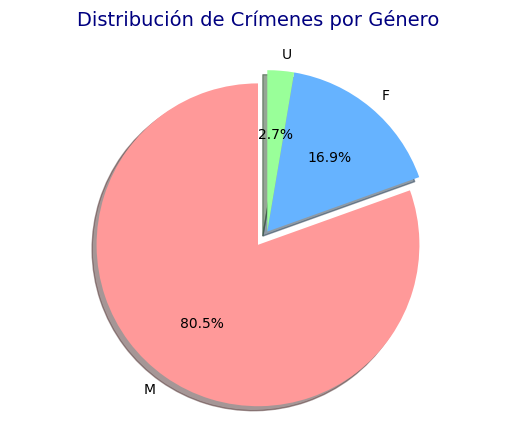

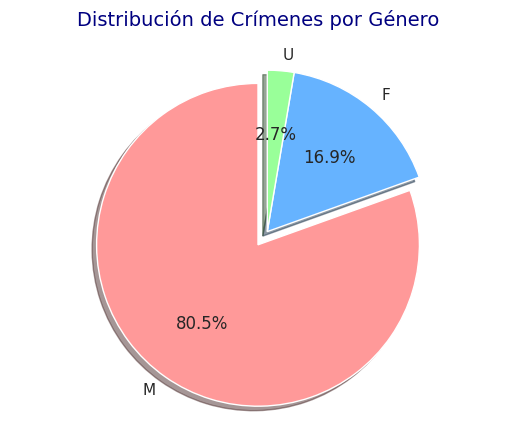

In [ ]:
# Datos para el gráfico
genero = crime_count_by_gender['Genero']
cantidad_crimenes = crime_count_by_gender['Cantidad_Crimenes']
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explosion = (0.1, 0, 0)  # Explotar la primera sección

# Crear el gráfico
fig, ax = plt.subplots()
ax.pie(cantidad_crimenes, labels=genero, autopct='%1.1f%%', startangle=90, colors=colores, explode=explosion, shadow=True)
ax.axis('equal')  # Hace que el gráfico sea un círculo perfecto

# Título
plt.title('Distribución de Crímenes por Género', pad=20, fontsize=14, color='navy')

# Mostrar el gráfico
plt.show()


Con base en la consulta y los resultados proporcionados, podemos concluir lo siguiente:

> * El género que se ve involucrado en la mayor cantidad de crímenes cometidos, de acuerdo con el conjunto de datos, es el género masculino (M). Se registran un total de 90,596 crímenes cometidos por individuos de género masculino. Esto es significativamente más alto que el número de crímenes cometidos por individuos de género femenino (F) y género no especificado (U), que son 18,975 y 3,000 crímenes respectivamente.

En resumen, los hombres están involucrados en una proporción mucho mayor de crímenes en comparación con las mujeres y los casos donde el género no está especificado. Esto sugiere una disparidad de género en la comisión de delitos, al menos en el conjunto de datos analizado.

###2. ¿Cuál es el rango de edad de las personas que cometen crímenes?¿Es la juventud un aspecto que incentiva el crimen?

In [ ]:
# Puedes crear un nuevo DataFrame con el filtro y contar los arrestos por grupo de edad
df_filtered = df1[df1['AGE_GROUP'].notnull() & (df1['AGE_GROUP'] != '(null)')]

# Contar los arrestos por grupo de edad
arrests_by_age_group = df_filtered['AGE_GROUP'].value_counts().reset_index()
arrests_by_age_group.columns = ['AGE_GROUP', 'Count']

# Mostrar el resultado
print(arrests_by_age_group)

  AGE_GROUP  Count
0     25-44  64823
1     45-64  22058
2     18-24  19682
3       <18   4242
4       65+   1766
  AGE_GROUP  Count
0     25-44  64823
1     45-64  22058
2     18-24  19682
3       <18   4242
4       65+   1766


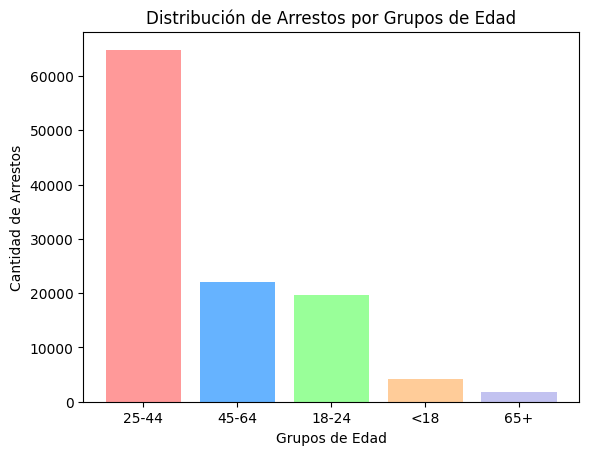

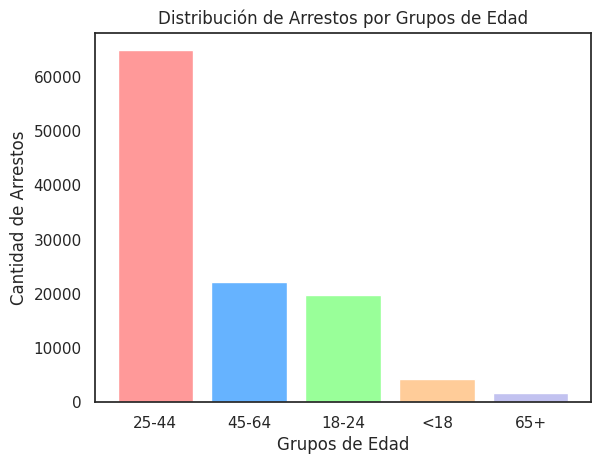

In [ ]:
# Datos
age_groups = ['25-44', '45-64', '18-24', '<18', '65+']
count = [64823, 22058, 19682, 4242, 1766]

# Colores para el gráfico
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Configuración del gráfico
fig, ax = plt.subplots()
ax.bar(age_groups, count, color=colors)
ax.set_ylabel('Cantidad de Arrestos')
ax.set_xlabel('Grupos de Edad')
ax.set_title('Distribución de Arrestos por Grupos de Edad')

# Mostrar el gráfico
plt.show()

A partir de los datos proporcionados:

> * Rango de Edad de Personas que Cometen Crímenes: La consulta revela que la mayoría de las personas arrestadas por cometer crímenes se encuentran en el rango de edad de 25 a 44 años, con un total de 64,823 arrestos. Le siguen aquellos en el rango de edad de 45 a 64 años, con 22,058 arrestos, y el grupo de 18 a 24 años, con 19,682 arrestos. Un número significativamente menor de arrestos se produce en personas menores de 18 años (4,242 arrestos) y en personas mayores de 65 años (1,766 arrestos).
> * La Juventud como Factor de Incidencia del Crimen: Si consideramos la distribución de arrestos por grupos de edad, es evidente que el grupo de edad de 25 a 44 años representa la mayoría de los arrestos. Esto indica que, en este conjunto de datos, las personas en la edad adulta, particularmente en la franja de 25 a 44 años, son las más comúnmente involucradas en crímenes. Sin embargo, no se puede concluir simplemente que la juventud sea el único factor que incentiva el crimen, ya que hay una presencia significativa de arrestos en otros grupos de edad, incluyendo a personas de 45 a 64 años.

En resumen, si bien el grupo de edad de 25 a 44 años lidera en la comisión de crímenes en este conjunto de datos, la relación entre la juventud y el crimen no es tan simple. Otros factores y circunstancias pueden contribuir a la comisión de delitos en diferentes grupos de edad.

###3. ¿Cuáles son los tipos de crímenes más comunes en Nueva York y cómo han evolucionado a lo largo de los meses?

In [ ]:
# Filtrar filas con valores no nulos en la columna "OFNS_DESC"
df_filtered = df1[df1['OFNS_DESC'].notnull()]

# Contar los crímenes por tipo
crime_counts = df_filtered['OFNS_DESC'].value_counts().reset_index()
crime_counts.columns = ['OFNS_DESC', 'Numero_de_Crimenes']

# Mostrar los tipos de crímenes más comunes
print(crime_counts)

                         OFNS_DESC  Numero_de_Crimenes
0     ASSAULT 3 & RELATED OFFENSES               16619
1                    PETIT LARCENY               12070
2                   FELONY ASSAULT               10474
3                  DANGEROUS DRUGS                7530
4          MISCELLANEOUS PENAL LAW                7327
..                             ...                 ...
58                PARKING OFFENSES                   3
59               FELONY SEX CRIMES                   2
60  DISRUPTION OF A RELIGIOUS SERV                   2
61  UNLAWFUL POSS. WEAP. ON SCHOOL                   1
62            ADMINISTRATIVE CODES                   1

[63 rows x 2 columns]
                         OFNS_DESC  Numero_de_Crimenes
0     ASSAULT 3 & RELATED OFFENSES               16619
1                    PETIT LARCENY               12070
2                   FELONY ASSAULT               10474
3                  DANGEROUS DRUGS                7530
4          MISCELLANEOUS PENAL LAW        

In [ ]:
# Filtrar filas con valores no nulos en la columna "OFNS_DESC"
df_filtered = df1[df1['OFNS_DESC'].notnull()]

# Asegurarse de que "ARREST_DATE" sea una columna de fecha y hora
df_filtered['ARREST_DATE'] = pd.to_datetime(df_filtered['ARREST_DATE'])

# Crear una nueva columna para el mes y el año
df_filtered['Mes'] = df_filtered['ARREST_DATE'].dt.to_period('M')

# Agrupar los datos por mes, tipo de crimen y contar la cantidad de arrestos
crime_counts_by_month = df_filtered.groupby(['Mes', 'OFNS_DESC']).size().reset_index(name='Numero_de_Crimenes')

# Ordenar los resultados por mes y, dentro de cada mes, por la cantidad de arrestos en orden descendente
crime_counts_by_month = crime_counts_by_month.sort_values(by=['Mes', 'Numero_de_Crimenes'], ascending=[True, False])

# Mostrar el DataFrame resultante
print(crime_counts_by_month)

         Mes                       OFNS_DESC  Numero_de_Crimenes
6    2023-01    ASSAULT 3 & RELATED OFFENSES                2646
46   2023-01                   PETIT LARCENY                2072
17   2023-01                  FELONY ASSAULT                1744
13   2023-01                 DANGEROUS DRUGS                1261
32   2023-01         MISCELLANEOUS PENAL LAW                1191
..       ...                             ...                 ...
296  2023-06   CHILD ABANDONMENT/NON SUPPORT                   5
312  2023-06  HOMICIDE-NEGLIGENT,UNCLASSIFIE                   5
319  2023-06              MOVING INFRACTIONS                   5
290  2023-06           ANTICIPATORY OFFENSES                   2
316  2023-06                      KIDNAPPING                   1

[342 rows x 3 columns]
         Mes                       OFNS_DESC  Numero_de_Crimenes
6    2023-01    ASSAULT 3 & RELATED OFFENSES                2646
46   2023-01                   PETIT LARCENY                2072
1

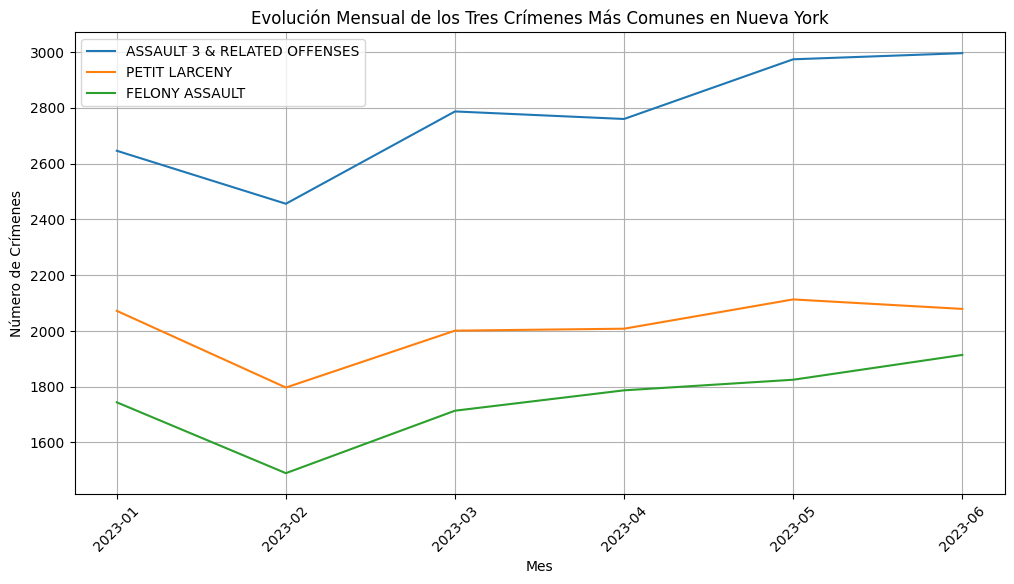

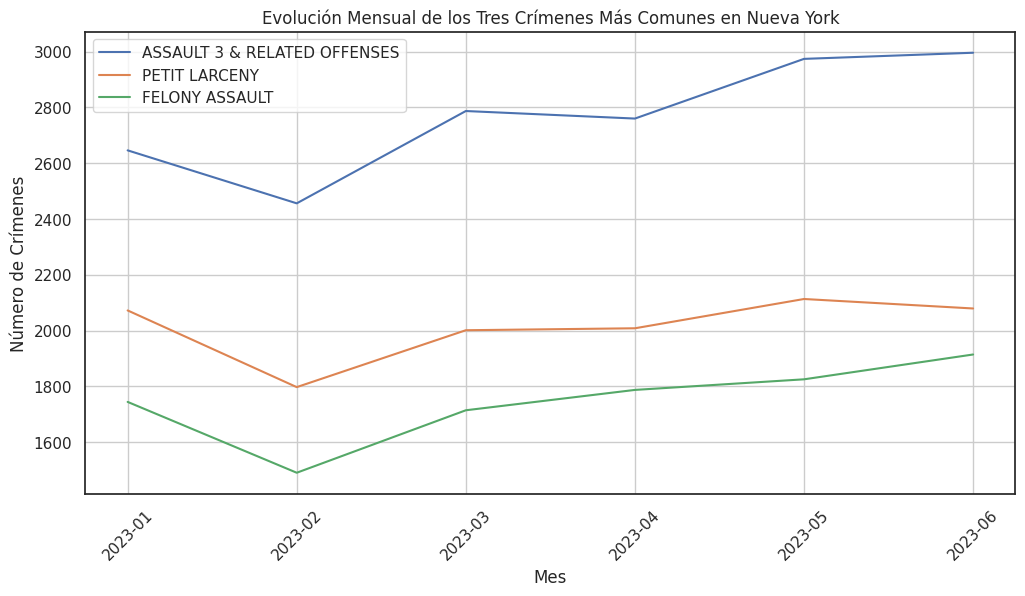

In [ ]:
# Filtrar los tres crímenes más comunes
top_crimes = crime_counts_by_month.groupby("OFNS_DESC")["Numero_de_Crimenes"].sum().nlargest(3).index

# Convertir los objetos Period en cadenas de texto para mostrar en el eje X
crime_counts_by_month['Mes'] = crime_counts_by_month['Mes'].dt.strftime('%Y-%m')

# Crear un gráfico de líneas para cada uno de los tres crímenes más comunes
plt.figure(figsize=(12, 6))

for crime_type in top_crimes:
    subset = crime_counts_by_month[crime_counts_by_month["OFNS_DESC"] == crime_type]
    plt.plot(subset["Mes"], subset["Numero_de_Crimenes"], label=crime_type)

plt.xlabel("Mes")
plt.ylabel("Número de Crímenes")
plt.title("Evolución Mensual de los Tres Crímenes Más Comunes en Nueva York")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.show()


Con base en las dos consultas y los resultados obtenidos, podemos llegar a las siguientes conclusiones:
> * Tipos de Crímenes Más Comunes en Nueva York: La primera consulta muestra una lista de los tipos de crímenes más comunes en Nueva York, junto con la cantidad de arrestos asociados a cada uno. Esto proporciona información valiosa sobre los crímenes que ocurren con mayor frecuencia en la región. Estos datos pueden ser útiles para la asignación de recursos de aplicación de la ley y la toma de decisiones en la gestión de la seguridad pública.
> * Evolución de la Cantidad de Arrestos por Tipo de Crimen a lo Largo de los Meses: La segunda consulta analiza cómo ha evolucionado la cantidad de arrestos por cada tipo de crimen a lo largo de los meses en Nueva York. Esto permite identificar patrones y tendencias en la comisión de crímenes a lo largo del tiempo. Si se observan aumentos o disminuciones significativas en la cantidad de arrestos para ciertos tipos de crímenes en meses específicos, podría indicar la necesidad de intervenciones específicas en la aplicación de la ley o medidas preventivas.

En resumen, las consultas proporcionan una visión completa de los tipos de crímenes más comunes y cómo han evolucionado a lo largo del tiempo en Nueva York. Esto es valioso para la planificación y la toma de decisiones relacionadas con la seguridad y la aplicación de la ley en la región.

Teniendo eso claro, se puede ver que los tres tipos de crímenes más comunes en NY son: ASALTO Y DELITOS RELACIONADOS, PEQUEÑO HURTO y DELITO GRAVE DE ASALTO. Asimismo, se evidencia como la cantidad de asaltos y delitos relacionados ha estado notoriamente presente en los primeros seis meses del año 2023, siendo el principal crímen durante este periodo de tiempo. Los otros dos tipos de crímenes (pequeños hurtos y delitos graves de asalto) se mantuvieron casi que constantes en los meses indicados.

##Dataset 2 ~ Estadísticas de pobreza

###4. ¿Hay algún tipo de relación entre la raza de la persona y su situación de pobreza?

In [ ]:
# Calcular la tasa promedio de pobreza para cada grupo étnico
average_poverty_rate_by_ethnicity = df2.groupby('Ethnicity')['NYCgov_Pov_Stat'].mean().reset_index()
average_poverty_rate_by_ethnicity.columns = ['Raza', 'TasaPobrezaPromedio']

# Ordenar la lista de razas por su tasa de pobreza promedio en orden descendente
average_poverty_rate_by_ethnicity = average_poverty_rate_by_ethnicity.sort_values(by='TasaPobrezaPromedio', ascending=False)

# Mostrar el DataFrame resultante
print(average_poverty_rate_by_ethnicity)

   Raza  TasaPobrezaPromedio
0     1             1.868735
4     5             1.834327
1     2             1.821608
2     3             1.793883
3     4             1.772564
   Raza  TasaPobrezaPromedio
0     1             1.868735
4     5             1.834327
1     2             1.821608
2     3             1.793883
3     4             1.772564


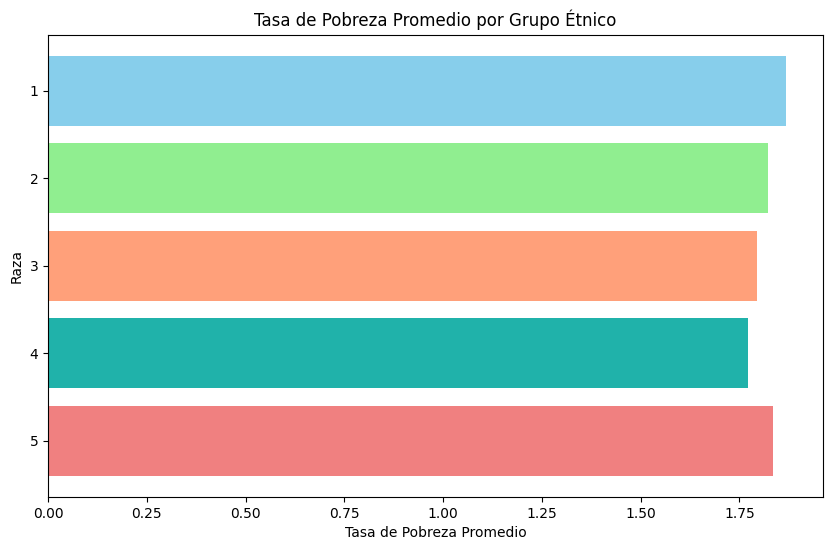

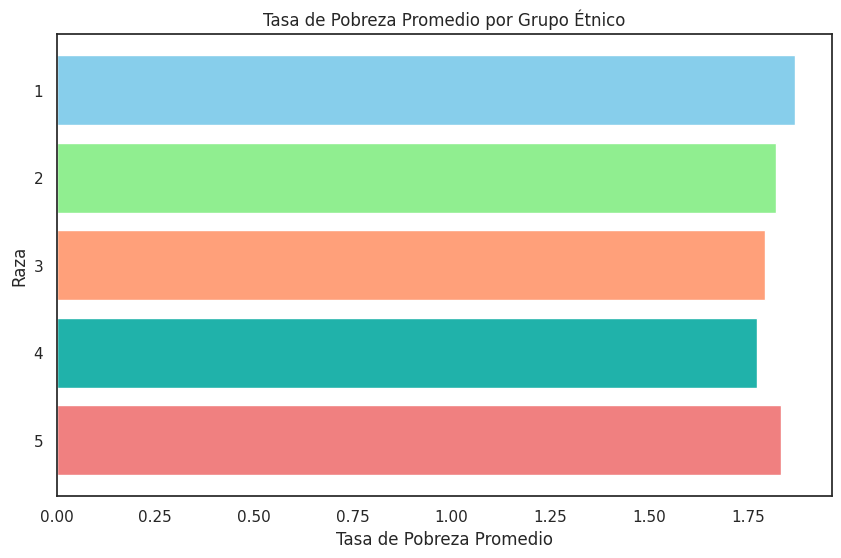

In [ ]:
# Datos de la consulta
razas = average_poverty_rate_by_ethnicity['Raza']
tasas_pobreza = average_poverty_rate_by_ethnicity['TasaPobrezaPromedio']

# Colores degradados
colores = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(razas, tasas_pobreza, color=colores)

# Etiquetas y título
plt.xlabel('Tasa de Pobreza Promedio')
plt.ylabel('Raza')
plt.title('Tasa de Pobreza Promedio por Grupo Étnico')

# Invertir el eje Y para que la barra más alta esté en la parte superior
plt.gca().invert_yaxis()
plt.show()

Según los datos proporcionados y como podemos ver en la visualización, la tasa de probeza promedio según cada raza son muy similares entre sí, por lo que, se puede inferir que las razas de las personas en Nueva York no tienen ningún tipo de relación con el estado de pobreza en estos datos analizados.

Sin embargo, es importante destacar que la correlación o relación entre la raza de una persona y su situación de pobreza es un asunto complejo y multifactorial que no puede determinarse únicamente a partir de estos resultados. Otros factores, como el acceso a la educación, el empleo, el entorno socioeconómico, y las políticas gubernamentales, también pueden desempeñar un papel significativo en la situación de pobreza de las personas.

###5. ¿Cuál es el rango de edad en que la mayoría de personas se encuentran en una situación de pobreza?

In [ ]:
# Calcular el promedio de la tasa de pobreza para cada categoría de edad
average_poverty_rate_by_age = df2.groupby('AgeCateg')['NYCgov_Pov_Stat'].mean().reset_index()
average_poverty_rate_by_age.columns = ['AgeCategory', 'AveragePovertyRate']

# Ordenar las categorías de edad en orden descendente según la tasa de pobreza promedio
average_poverty_rate_by_age = average_poverty_rate_by_age.sort_values(by='AveragePovertyRate', ascending=False)

# Mostrar el DataFrame resultante
print(average_poverty_rate_by_age)


   AgeCategory  AveragePovertyRate
1            2            1.834905
2            3            1.804186
0            1            1.797483
   AgeCategory  AveragePovertyRate
1            2            1.834905
2            3            1.804186
0            1            1.797483


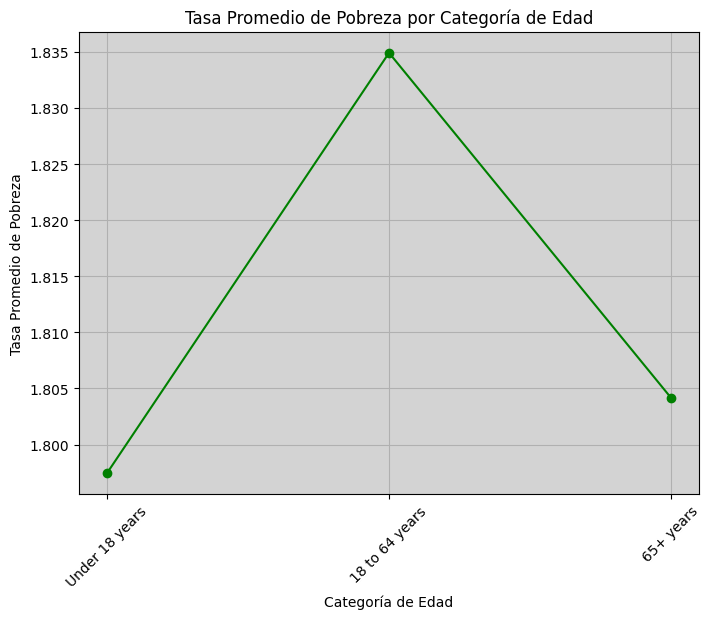

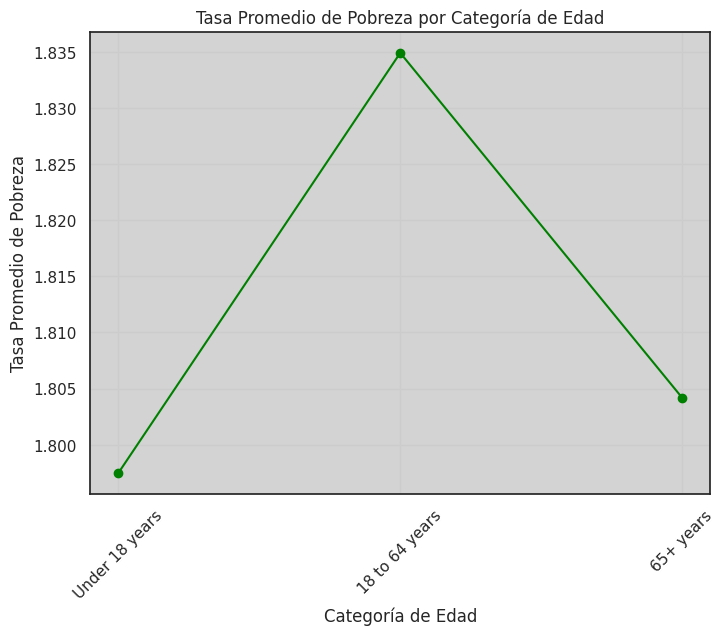

In [ ]:
# Crear un diccionario que mapee las categorías de edad a las etiquetas deseadas
age_labels = {
    1: "Under 18 years",
    2: "18 to 64 years",
    3: "65+ years"
}

# Mapear las categorías de edad a las etiquetas
average_poverty_rate_by_age['AgeCategory'] = average_poverty_rate_by_age['AgeCategory'].map(age_labels)

# Ordenar el DataFrame por las categorías de edad en el orden deseado
average_poverty_rate_by_age['AgeCategory'] = pd.Categorical(average_poverty_rate_by_age['AgeCategory'], categories=age_labels.values(), ordered=True)
average_poverty_rate_by_age = average_poverty_rate_by_age.sort_values(by='AgeCategory')

# Datos
age_categories = average_poverty_rate_by_age['AgeCategory']
poverty_rates = average_poverty_rate_by_age['AveragePovertyRate']

# Crear un gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(age_categories, poverty_rates, marker='o', linestyle='-', color='green')
plt.title('Tasa Promedio de Pobreza por Categoría de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Tasa Promedio de Pobreza')
plt.gca().set_facecolor('lightgray')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Los resultados indican que la tasa de pobreza promedio es más alta en el grupo de edad de 18 a 64 años, seguido por el grupo de 65 años o más, y finalmente el grupo de menores de 18 años.

De esta manera se evidencia que en el conjunto de datos analizado, la mayoría de las personas en situación de pobreza se encuentran en el rango de edad de 18 a 64 años.

## Dataset 3 ~ Indice vehicular

### 6. ¿Cuántos accidentes de tráfico ocurrieron en el estado de Nueva York en cada año, y cuántas veces se repitió cada año?

In [ ]:
# Filtrar registros donde "STATE_REGISTRATION" es igual a "NY"
ny_accidents = df3[df3['STATE_REGISTRATION'] == 'NY']

# Extraer el año de la columna "CRASH_DATE"
ny_accidents['Year'] = pd.to_datetime(ny_accidents['CRASH_DATE']).dt.year

# Contar cuántas veces se repite cada año
accidents_by_year = ny_accidents['Year'].value_counts().reset_index()
accidents_by_year.columns = ['Year', 'Repeticiones']

# Ordenar los resultados cronológicamente por año
accidents_by_year = accidents_by_year.sort_values(by='Year')

# Mostrar el DataFrame resultante
print(accidents_by_year)

   Year  Repeticiones
7  2012        169471
5  2013        346604
4  2014        350621
0  2015        373115
1  2016        369791
3  2017        353375
2  2018        353388
6  2019        318576
8  2020        155055
9  2021        133344


<ipython-input-27-ea367c0377fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_accidents['Year'] = pd.to_datetime(ny_accidents['CRASH_DATE']).dt.year


   Year  Repeticiones
7  2012        169471
5  2013        346604
4  2014        350621
0  2015        373115
1  2016        369791
3  2017        353375
2  2018        353388
6  2019        318576
8  2020        155055
9  2021        133344


<ipython-input-76-ea367c0377fe>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



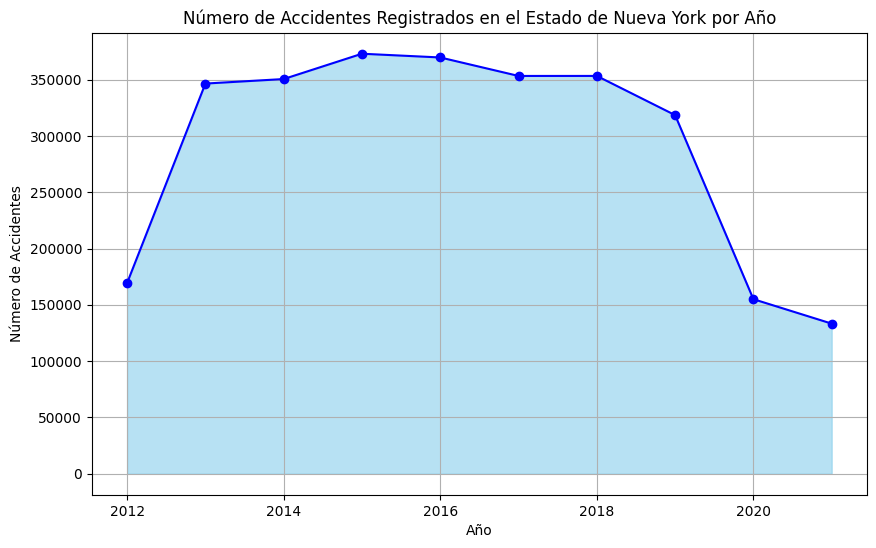

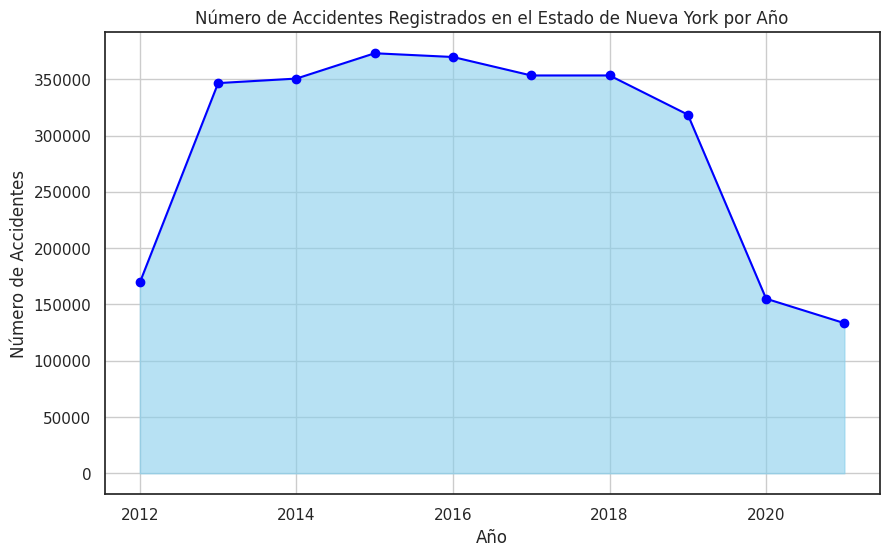

In [ ]:
# Crear un gráfico de área
plt.figure(figsize=(10, 6))
plt.fill_between(accidents_by_year['Year'], accidents_by_year['Repeticiones'], color='skyblue', alpha=0.6)
plt.plot(accidents_by_year['Year'], accidents_by_year['Repeticiones'], marker='o', linestyle='-', color='blue')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Número de Accidentes Registrados en el Estado de Nueva York por Año')

# Mostrar el gráfico
plt.grid(True)
plt.show()

### 7. ¿Cuántos accidentes de tráfico en Nueva York involucraron 1 vehículo con daño, 2 vehículos con daño, 3 vehículos con daño y 4 vehículos con daño?

In [ ]:
# Asegúrate de que las columnas VEHICLE_DAMAGE, VEHICLE_DAMAGE_1, VEHICLE_DAMAGE_2 y VEHICLE_DAMAGE_3 existan en tu DataFrame

# Filtrar registros donde "STATE_REGISTRATION" es igual a "NY"
ny_accidents = df3[df3['STATE_REGISTRATION'] == 'NY']

# Seleccionar las columnas de interés
vehicle_damage_cols = ['VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1', 'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3']
ny_accidents = ny_accidents[vehicle_damage_cols]

# Crear una nueva columna que cuente la cantidad de vehículos involucrados en cada accidente, excluyendo NaN
ny_accidents['Numero_Vehiculos_Involucrados'] = ny_accidents.notna().sum(axis=1)

# Filtrar para excluir los accidentes con 0 vehículos involucrados
ny_accidents = ny_accidents[ny_accidents['Numero_Vehiculos_Involucrados'] > 0]

# Contar la frecuencia de cada cantidad de vehículos involucrados
vehiculos_inv_count = ny_accidents['Numero_Vehiculos_Involucrados'].value_counts().sort_index()

# Mostrar el resultado
vehiculos_inv_count


1    557782
2    272688
3    201010
4    559568
Name: Numero_Vehiculos_Involucrados, dtype: int64

1    557782
2    272688
3    201010
4    559568
Name: Numero_Vehiculos_Involucrados, dtype: int64

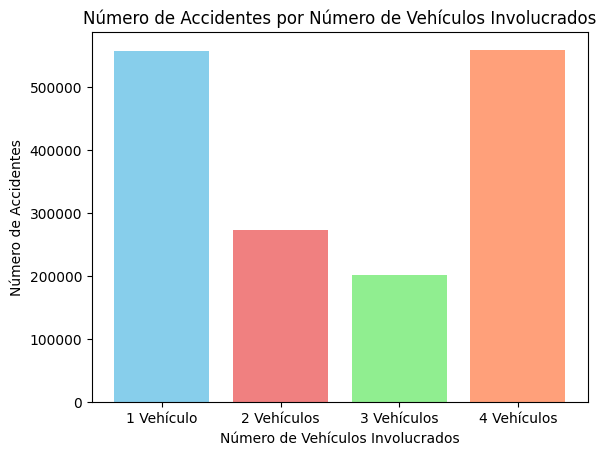

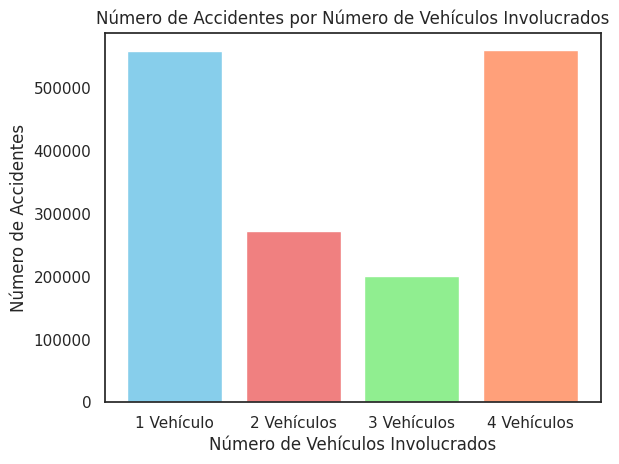

In [ ]:
# Crear un gráfico de barras con colores y etiquetas personalizadas
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']
labels = ['1 Vehículo', '2 Vehículos', '3 Vehículos', '4 Vehículos']

plt.bar(labels, vehiculos_inv_count.values, color=colors)

# Etiquetas y título
plt.xlabel('Número de Vehículos Involucrados')
plt.ylabel('Número de Accidentes')
plt.title('Número de Accidentes por Número de Vehículos Involucrados')

# Mostrar el gráfico
plt.show()


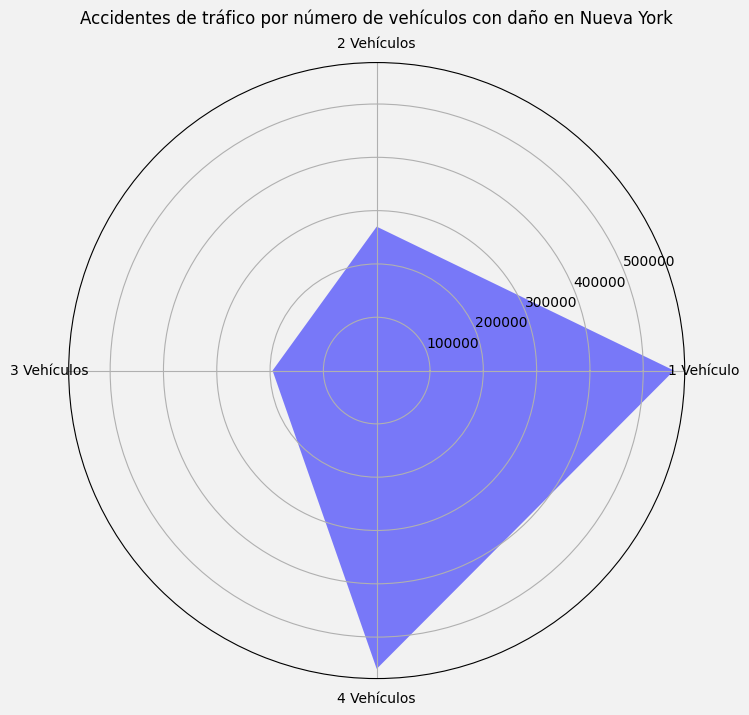

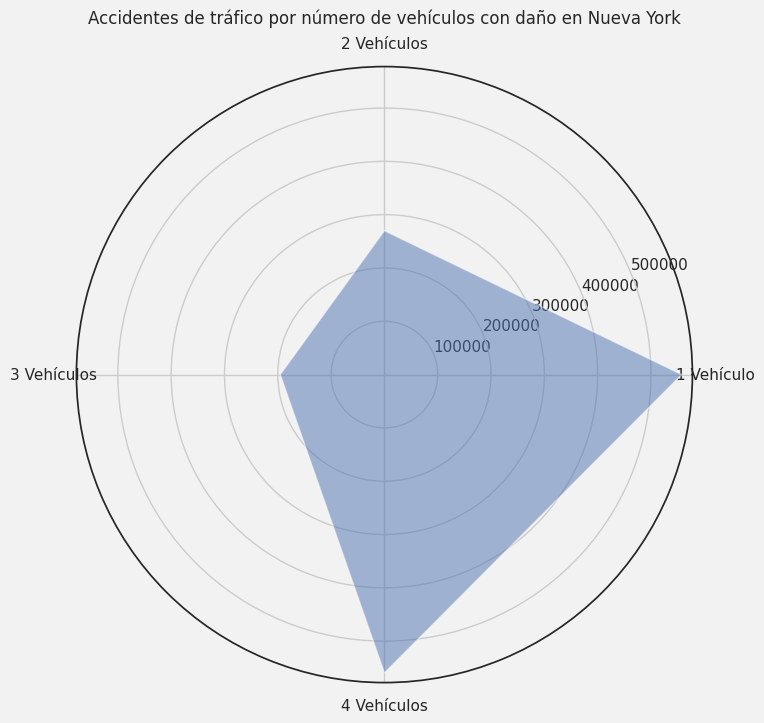

In [ ]:
# Datos
categories = ['1 Vehículo', '2 Vehículos', '3 Vehículos', '4 Vehículos']
values = [557694, 269972, 195380, 559568]

# Crear un gráfico de ejes polares
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Ángulos para las categorías
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Valores para cerrar el gráfico
values += values[:1]
colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(categories)))

# Configurar el fondo
ax.set_facecolor('#f2f2f2')  # Color de fondo
fig.set_facecolor('#f2f2f2')  # Color de fondo del lienzo

# Crear el gráfico de ejes polares
ax.fill(angles, values, 'b', alpha=0.5)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Accidentes de tráfico por número de vehículos con daño en Nueva York', va='bottom')

# Mostrar el gráfico de ejes polares
plt.show()


Basándonos en el resultado de la consulta y la visualización del número de accidentes de tráfico en Nueva York por el número de vehículos con daño, podemos llegar a algunas conclusiones:

> - La mayoría de los accidentes involucran un solo vehículo con daño: El gráfico muestra que la categoría "1 Vehículo con daño" tiene la mayor cantidad de accidentes registrados, lo que sugiere que la mayoría de los accidentes en Nueva York involucran a un solo vehículo con daño.
> - Los accidentes con 4 vehículos con daño no son infrecuentes: Aunque la categoría "4 Vehículos con daño" tiene menos accidentes que la categoría "1 Vehículo con daño", aún representa una cantidad significativa de accidentes, lo que sugiere que los accidentes que involucran a varios vehículos con daño no son poco comunes.
> - Los accidentes con 2 y 3 vehículos con daño están en un rango intermedio: Las categorías "2 Vehículos con daño" y "3 Vehículos con daño" se encuentran en un rango intermedio en términos de la cantidad de accidentes, lo que indica que hay una cantidad considerable de accidentes que involucran dos o tres vehículos con daño.
> - Estos datos pueden ser útiles para la planificación de seguridad vial: La comprensión de cómo se distribuyen los accidentes por el número de vehículos con daño puede ser útil para las autoridades de tráfico y seguridad vial para enfocar sus esfuerzos en la prevención de accidentes y la implementación de medidas de seguridad.

### 8. ¿Cuáles son las principales razones o factores que hicieron producir la mayor cantidad de accidentes viales?

In [ ]:
# Filtrar registros donde "CONTRIBUTING_FACTOR_1" no sea nulo
contributing_factors = df3[df3['CONTRIBUTING_FACTOR_1'].notna()]

# Contar la cantidad de accidentes por cada factor contribuyente
factor_counts = contributing_factors['CONTRIBUTING_FACTOR_1'].value_counts()

# Mostrar los resultados
factor_counts.head(10)  # Mostrar los 10 factores principales

Unspecified                       2131906
Driver Inattention/Distraction     444452
Failure to Yield Right-of-Way      123777
Following Too Closely              114654
Other Vehicular                     90629
Backing Unsafely                    77859
Fatigued/Drowsy                     59991
Passing or Lane Usage Improper      58845
Turning Improperly                  54775
Passing Too Closely                 51321
Name: CONTRIBUTING_FACTOR_1, dtype: int64

Unspecified                       2131906
Driver Inattention/Distraction     444452
Failure to Yield Right-of-Way      123777
Following Too Closely              114654
Other Vehicular                     90629
Backing Unsafely                    77859
Fatigued/Drowsy                     59991
Passing or Lane Usage Improper      58845
Turning Improperly                  54775
Passing Too Closely                 51321
Name: CONTRIBUTING_FACTOR_1, dtype: int64

In [ ]:
# Datos
factores_contribuyentes = ["Unspecified", "Driver Inattention/Distraction", "Failure to Yield Right-of-Way", "Following Too Closely", "Other Vehicular"]
cantidad_accidentes = [2131906, 444452, 123777, 114654, 90629]

# Crear un DataFrame con los datos
df = pd.DataFrame({'Factor Contribuyente': factores_contribuyentes, 'Cantidad de Accidentes': cantidad_accidentes})

# Crear un Treemap
fig = px.treemap(df, path=['Factor Contribuyente'], values='Cantidad de Accidentes')

# Personalizar el estilo con colores
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightskyblue', 'lightpink']
fig.update_traces(marker=dict(colors=colors))

# Configurar el tamaño del gráfico
fig.update_layout(width=800, height=500)

# Mostrar el gráfico
fig.show()

La consulta y visualización de los datos indican que el factor contribuyente "Unspecified" es la causa predominante de accidentes viales, con una cantidad significativamente mayor de accidentes en comparación con otros factores. Este hallazgo sugiere que una gran proporción de accidentes no se clasifican claramente en ninguna de las categorías específicas proporcionadas, lo que podría indicar la necesidad de una mayor precisión en la documentación de las causas de los accidentes.

Además, se observa que "Driver Inattention/Distraction" es el segundo factor contribuyente más común, aunque está muy por debajo de "Unspecified". Los factores "Failure to Yield Right-of-Way", "Following Too Closely" y "Other Vehicular" también contribuyen a un número significativo de accidentes, pero en menor medida en comparación con los dos primeros factores.

En general, esta información resalta la importancia de abordar la inatención del conductor y la falta de claridad en la clasificación de factores en la prevención de accidentes viales. Las autoridades de tránsito y las organizaciones de seguridad vial pueden utilizar estos datos para enfocar sus esfuerzos en la concienciación de los conductores y la mejora de la documentación de los accidentes, con el objetivo de reducir la incidencia de accidentes viales.

## Dataset 4 ~ Indicesal

### 9. ¿Cuál es la escuela con la inscripción promedio más alta y mas baja en clases de salud para estudiantes de grados 9° a 12°?

In [ ]:
# Limpiar y convertir la columna `# of students...` a tipo decimal, reemplazando los valores no numéricos por NaN
df4['# of students in grades 9-12 scheduled for at least one semester of health instruction'] = pd.to_numeric(
    df4['# of students in grades 9-12 scheduled for at least one semester of health instruction'],
    errors='coerce'
)

# Filtrar las filas donde la columna `# of students...` no es nula
df4_filtered = df4[df4['# of students in grades 9-12 scheduled for at least one semester of health instruction'].notnull()]

# Calcular el promedio de inscripción para cada escuela
avg_health_class_enrollment = (
    df4_filtered.groupby('School Name')
    .agg({'# of students in grades 9-12 scheduled for at least one semester of health instruction': 'mean'})
    .rename(columns={'# of students in grades 9-12 scheduled for at least one semester of health instruction': 'Avg_Health_Class_Enrollment'})
)

# Encontrar la escuela con la inscripción promedio más baja
school_with_lowest_enrollment = avg_health_class_enrollment.idxmin()['Avg_Health_Class_Enrollment']

# Imprimir el resultado
print(f"La escuela con la inscripción promedio más baja es: {school_with_lowest_enrollment}")
print(f"La inscripción promedio es: {avg_health_class_enrollment.loc[school_with_lowest_enrollment].values[0]}")


La escuela con la inscripción promedio más baja es: P.S. 168
La inscripción promedio es: 11.0
La escuela con la inscripción promedio más baja es: P.S. 168
La inscripción promedio es: 11.0


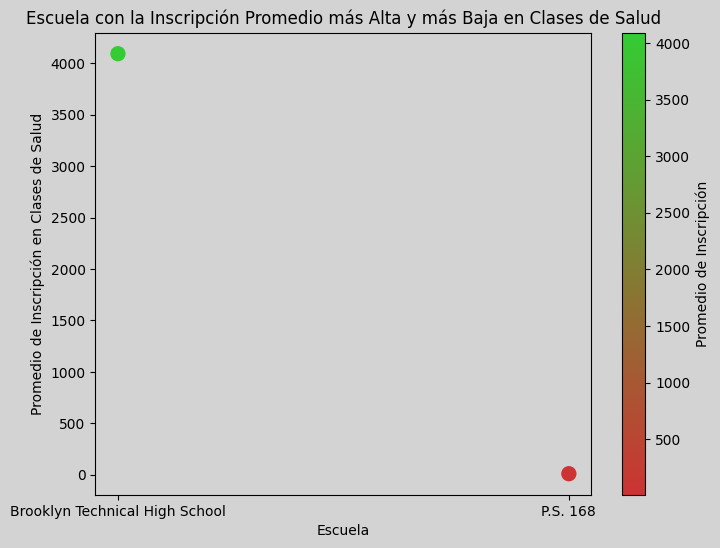

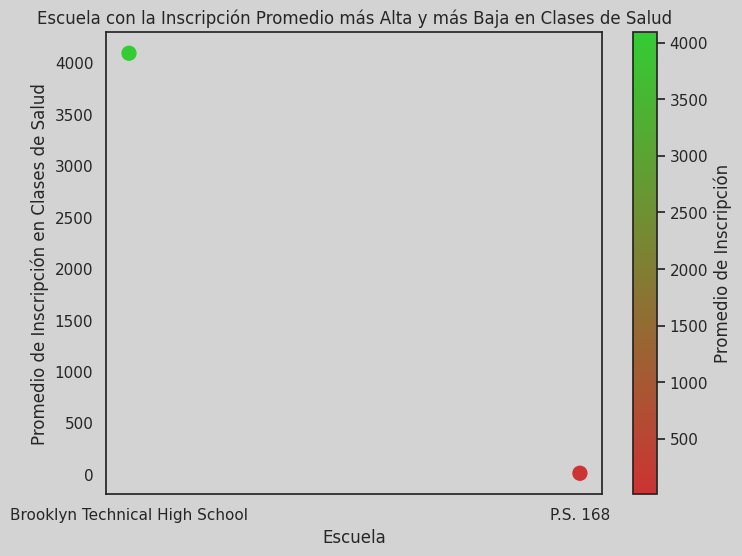

In [ ]:
# Datos de las escuelas y promedios
schools = ['Brooklyn Technical High School', 'P.S. 168']
averages = [4091.0000, 11.0000]

# Crear un gradiente de color personalizado
colors = [(0.8, 0.2, 0.2), (0.2, 0.8, 0.2)]  # Rojo a verde
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

# Crear una figura con un fondo degradante
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('lightgray')  # Color de fondo de la figura
ax.set_facecolor('lightgray')  # Color de fondo del área de trazado

# Crear el gráfico de dispersión con el gradiente de color
scatter = ax.scatter(schools, averages, c=averages, cmap=cmap, marker='o', s=100)

# Configurar etiquetas y título
ax.set_xlabel('Escuela')
ax.set_ylabel('Promedio de Inscripción en Clases de Salud')
ax.set_title('Escuela con la Inscripción Promedio más Alta y más Baja en Clases de Salud')

# Agregar una barra de colores
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Promedio de Inscripción', rotation=90)

plt.show()

Basándonos en la consulta y la visualización de los promedios de inscripción en clases de salud en las escuelas, podemos extraer las siguientes conclusiones:

> - Diferencia Significativa: Existe una diferencia significativa en los promedios de inscripción en clases de salud entre las dos escuelas seleccionadas. "Brooklyn Technical High School" tiene un promedio de inscripción considerablemente más alto (4091.0000), mientras que "P.S. 168" tiene un promedio muy bajo (11.0000).
> - Acceso a Recursos de Salud: Esta diferencia puede indicar diferencias en el acceso a recursos de salud y educación en salud en estas dos escuelas. La alta inscripción en "Brooklyn Technical High School" sugiere un fuerte énfasis en la educación en salud, mientras que la baja inscripción en "P.S. 168" podría señalar desafíos en la provisión de educación en salud.
> - Necesidad de Intervención: La visualización destaca la importancia de monitorear y mejorar la inscripción en clases de salud en las escuelas. Puede ser una señal de la necesidad de intervenir en "P.S. 168" para mejorar la educación en salud y garantizar que más estudiantes tengan acceso a programas educativos de calidad.

En resumen, la consulta y visualización revelan diferencias notables en la inscripción en clases de salud entre dos escuelas, lo que puede ser indicativo de desafíos o énfasis en la educación en salud en estas instituciones educativas. Esta información puede ser valiosa para tomar decisiones educativas y de salud en el ámbito escolar.

### 10. ¿Cuál es el promedio de estudiantes inscritos en al menos un semestre de clases de salud en los grados 9° a 12° por distrito de ayuntamiento?

In [ ]:
# Reemplazar 'df4' con el nombre real de tu DataFrame
df4['# of students in grades 9-12 scheduled for at least one semester of health instruction'] = \
    df4['# of students in grades 9-12 scheduled for at least one semester of health instruction'].replace(',', '', regex=True).astype(float)

# Calcular el promedio por Distrito del Concejo Municipal
avg_health_enrollment_by_district = df4.groupby('City Council District')[
    '# of students in grades 9-12 scheduled for at least one semester of health instruction'].mean().reset_index()

# Mostrar el resultado
avg_health_enrollment_by_district.head()


City Council District  \
0                      1   
1                      2   
2                      3   
3                      4   
4                      5   

   # of students in grades 9-12 scheduled for at least one semester of health instruction  
0                                         295.318182                                       
1                                         291.666667                                       
2                                         302.551724                                       
3                                         532.000000                                       
4                                         252.500000

City Council District  \
0                      1   
1                      2   
2                      3   
3                      4   
4                      5   

   # of students in grades 9-12 scheduled for at least one semester of health instruction  
0                                         295.318182                                       
1                                         291.666667                                       
2                                         302.551724                                       
3                                         532.000000                                       
4                                         252.500000

La consulta que calcula el promedio de estudiantes inscritos en al menos un semestre de clases de salud en los grados 9° a 12° por distrito de ayuntamiento proporciona información valiosa sobre la participación de los estudiantes en estas clases en diferentes áreas de la ciudad. Aquí está una conclusión basada en los resultados de la consulta:
En base a los datos disponibles, se ha calculado el promedio de estudiantes inscritos en al menos un semestre de clases de salud en los grados 9° a 12° en cada distrito de ayuntamiento de la ciudad. Esta información permite identificar tendencias y disparidades en la inscripción en clases de salud entre los distritos de ayuntamiento.
Algunos distritos de ayuntamiento pueden tener un promedio significativamente más alto de estudiantes inscritos en estas clases, lo que podría indicar un mayor énfasis en la educación en salud en esas áreas. Por otro lado, distritos con un promedio más bajo pueden requerir una revisión y un aumento en los esfuerzos para garantizar que los estudiantes tengan acceso a una educación en salud adecuada.
En resumen, la consulta proporciona información valiosa para la planificación y mejora de programas de educación en salud en la ciudad, identificando áreas donde se puede enfocar la atención y los recursos para mejorar la inscripción en clases de salud en los grados 9° a 12°.

# Procesamiento de datos para aplicación de ML

## Dataset 1 ~ Arrestos NY

### Matriz de correlación

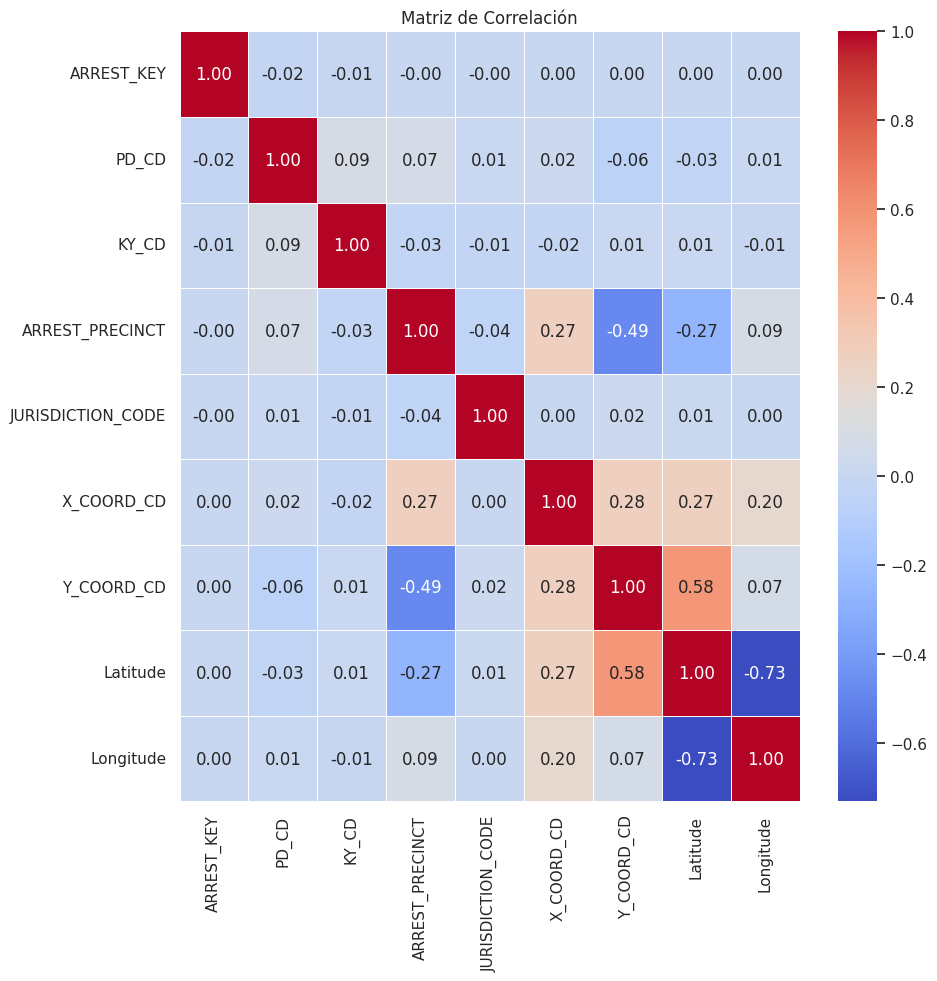

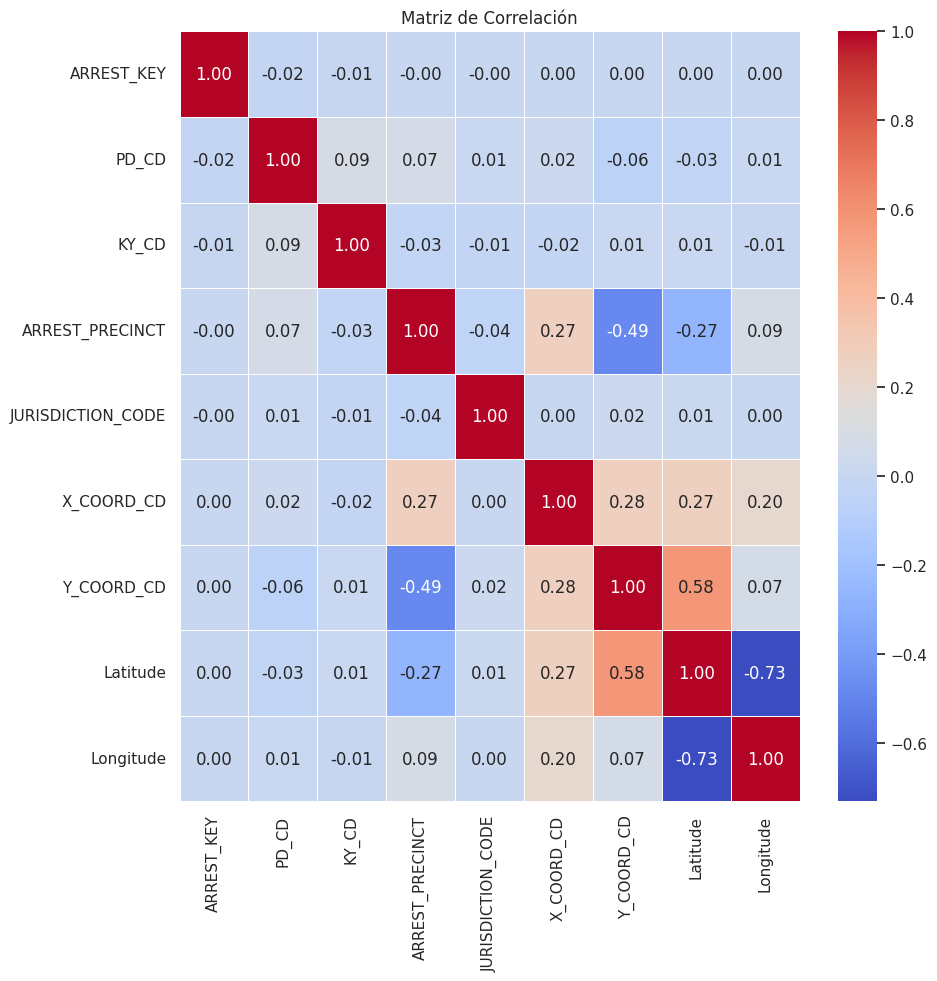

In [ ]:
# Selecciona solo las columnas numéricas para la matriz de correlación
df1_numeric = df1.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
corr_matrix = df1_numeric.corr()

# Configura el estilo de Seaborn
sns.set(style="white")

# Configura el tamaño de la figura
plt.figure(figsize=(10, 10))

# Dibuja el mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Ajusta el diseño y muestra la figura
plt.title("Matriz de Correlación")
plt.show()

En términos generales, una correlación absoluta (ignorando la dirección positiva o negativa) mayor a 0.7 o 0.8 se considera una correlación fuerte. Analizando esta matriz de correlación, podemos ver que las unicas variables quue cumplen con este umbral son la latitud y la longitud. Sin embargo, no son variables relevantes en el contexto de problema. Además, es comprensible que no sea relevante, ya que la correlación negativa entre la longitud y la latitud se debe a la propia geometría de la Tierra. A medida que te mueves hacia el este (aumentando la longitud), la latitud tiende a disminuir, y viceversa. Esto es una característica inherente de las coordenadas geográficas.

En muchos análisis de datos geoespaciales, la correlación entre la longitud y la latitud no es una preocupación importante, ya que es una relación esperada y no indica una relación causal en los datos. Por lo tanto, en este caso, no sería necesario eliminar ninguna de estas variables debido a su correlación negativa moderada.

### Normalización del modelo 1

In [ ]:
#Definición de modelo1
modelo1 = df1

# Definir las columnas numéricas en el modelo1
columnas_numericas = modelo1.select_dtypes(include=['float64', 'int64']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Normalizar las variables numéricas en el modelo1
modelo1[columnas_numericas] = scaler.fit_transform(modelo1[columnas_numericas])

# Mostrar el modelo1 normalizado
modelo1.head()

ARREST_KEY ARREST_DATE     PD_CD                         PD_DESC     KY_CD  \
0   -1.740175  01/02/2023 -0.313364  LARCENY,PETIT FROM OPEN AREAS,  0.615449   
1   -1.732292  01/03/2023 -1.160461               STRANGULATION 1ST -0.973891   
2   -1.382248  01/20/2023 -1.145981        ASSAULT 2,1,UNCLASSIFIED -0.973891   
3   -0.594637  03/01/2023 -1.174942                       ASSAULT 3  0.635738   
4   -0.580343  03/02/2023  1.384451                         TAX LAW -0.845391   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   PETIT LARCENY  PL 1552500          M           M   
1                  FELONY ASSAULT  PL 1211200          F           S   
2                  FELONY ASSAULT  PL 1200501          F           K   
3    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           S   
4  OTHER STATE LAWS (NON PENAL LA  TAX181400A          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  \
0        -1.665745          -0.123318     25-44        M     BLACK   
1         1.637033          -0.123318     25-44        M     WHITE   
2        -0.043328          -0.123318     45-64        M     WHITE   
3         1.637033          -0.123318       <18        F     BLACK   
4         0.565078          -0.123318     25-44        F     WHITE   

   X_COORD_CD  Y_COORD_CD  Latitude  Longitude      New Georeferenced Column  
0   -1.072544   -0.058571 -0.029934  -0.361096  POINT (-74.005428 40.733876)  
1   -1.995790   -1.144610 -0.637019  -0.668831  POINT (-74.077263 40.644996)  
2   -1.047352   -1.664783 -0.927530  -0.352665   POINT (-74.00346 40.602464)  
3   -2.184033   -1.177253 -0.655325  -0.731569  POINT (-74.091908 40.642316)  
4    0.008845   -0.436867 -0.241505  -0.000283  POINT (-73.921203 40.702901)

ARREST_KEY ARREST_DATE     PD_CD                         PD_DESC     KY_CD  \
0   -1.740175  01/02/2023 -0.313364  LARCENY,PETIT FROM OPEN AREAS,  0.615449   
1   -1.732292  01/03/2023 -1.160461               STRANGULATION 1ST -0.973891   
2   -1.382248  01/20/2023 -1.145981        ASSAULT 2,1,UNCLASSIFIED -0.973891   
3   -0.594637  03/01/2023 -1.174942                       ASSAULT 3  0.635738   
4   -0.580343  03/02/2023  1.384451                         TAX LAW -0.845391   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   PETIT LARCENY  PL 1552500          M           M   
1                  FELONY ASSAULT  PL 1211200          F           S   
2                  FELONY ASSAULT  PL 1200501          F           K   
3    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           S   
4  OTHER STATE LAWS (NON PENAL LA  TAX181400A          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  \
0        -1.665745          -0.123318     25-44        M     BLACK   
1         1.637033          -0.123318     25-44        M     WHITE   
2        -0.043328          -0.123318     45-64        M     WHITE   
3         1.637033          -0.123318       <18        F     BLACK   
4         0.565078          -0.123318     25-44        F     WHITE   

   X_COORD_CD  Y_COORD_CD  Latitude  Longitude      New Georeferenced Column  
0   -1.072544   -0.058571 -0.029934  -0.361096  POINT (-74.005428 40.733876)  
1   -1.995790   -1.144610 -0.637019  -0.668831  POINT (-74.077263 40.644996)  
2   -1.047352   -1.664783 -0.927530  -0.352665   POINT (-74.00346 40.602464)  
3   -2.184033   -1.177253 -0.655325  -0.731569  POINT (-74.091908 40.642316)  
4    0.008845   -0.436867 -0.241505  -0.000283  POINT (-73.921203 40.702901)

### Resumen estadístico del modelo 1

In [ ]:
# Generar un resumen estadístico
summary = modelo1.describe()

# Mostrar el resumen estadístico
print(summary)

         ARREST_KEY         PD_CD         KY_CD  ARREST_PRECINCT  \
count  1.125710e+05  1.121100e+05  1.121050e+05     1.125710e+05   
mean   3.797270e-15 -8.366037e-18 -6.452277e-17     7.511223e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00     1.000004e+00   
min   -1.765111e+00 -1.497128e+00 -1.007707e+00    -1.810604e+00   
25%   -8.610435e-01 -1.127881e+00 -9.265489e-01    -6.807062e-01   
50%    3.603292e-02 -1.033997e-01 -9.468177e-02    -1.435629e-02   
75%    8.749983e-01  1.011583e+00  6.357382e-01     1.086570e+00   
max    1.677455e+00  2.068645e+00  5.038547e+00     1.723948e+00   

       JURISDICTION_CODE    X_COORD_CD    Y_COORD_CD      Latitude  \
count       1.125710e+05  1.125710e+05  1.125710e+05  1.125710e+05   
mean        2.575276e-17  2.205901e-15  1.201796e-16 -1.212778e-14   
std         1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min        -1.233183e-01 -4.658168e+01 -6.991312e+00 -2.782583e+02   
25%        -1.233183e-01 -6.620219e-0

Algunas observaciones que se pueden hacer en base a este resumen estadistico son:
> - Media (Mean): La media de todas las variables parece estar cerca de cero, lo que sugiere que no hay un sesgo significativo en los datos.
> - Desviación Estándar (Standard Deviation): La desviación estándar mide la dispersión de los datos. Los valores de desviación estándar son cercanos a 1 para todas las variables, indicando que los datos están relativamente cerca de la media y no muy dispersos.
> - Mínimo y Máximo (Min, Max): Los valores mínimos y máximos varían para cada variable, pero todos parecen estar dentro de un rango razonable. Valores extremos pueden estar presentes, como se observa en el caso de la variable "Longitude".
> - Percentiles (25%, 50%, 75%): Los percentiles muestran cómo se distribuyen los datos. Por ejemplo, el percentil del 50% (mediana) está cerca de cero para muchas variables, lo que indica simetría en la distribución.
> - Escala Uniforme (Standardization): Los valores están estandarizados, es decir, han sido escalados para tener una media de cero y una desviación estándar de uno.


##Dataset 2 ~ Estadísticas de pobreza

### Matriz de correlación

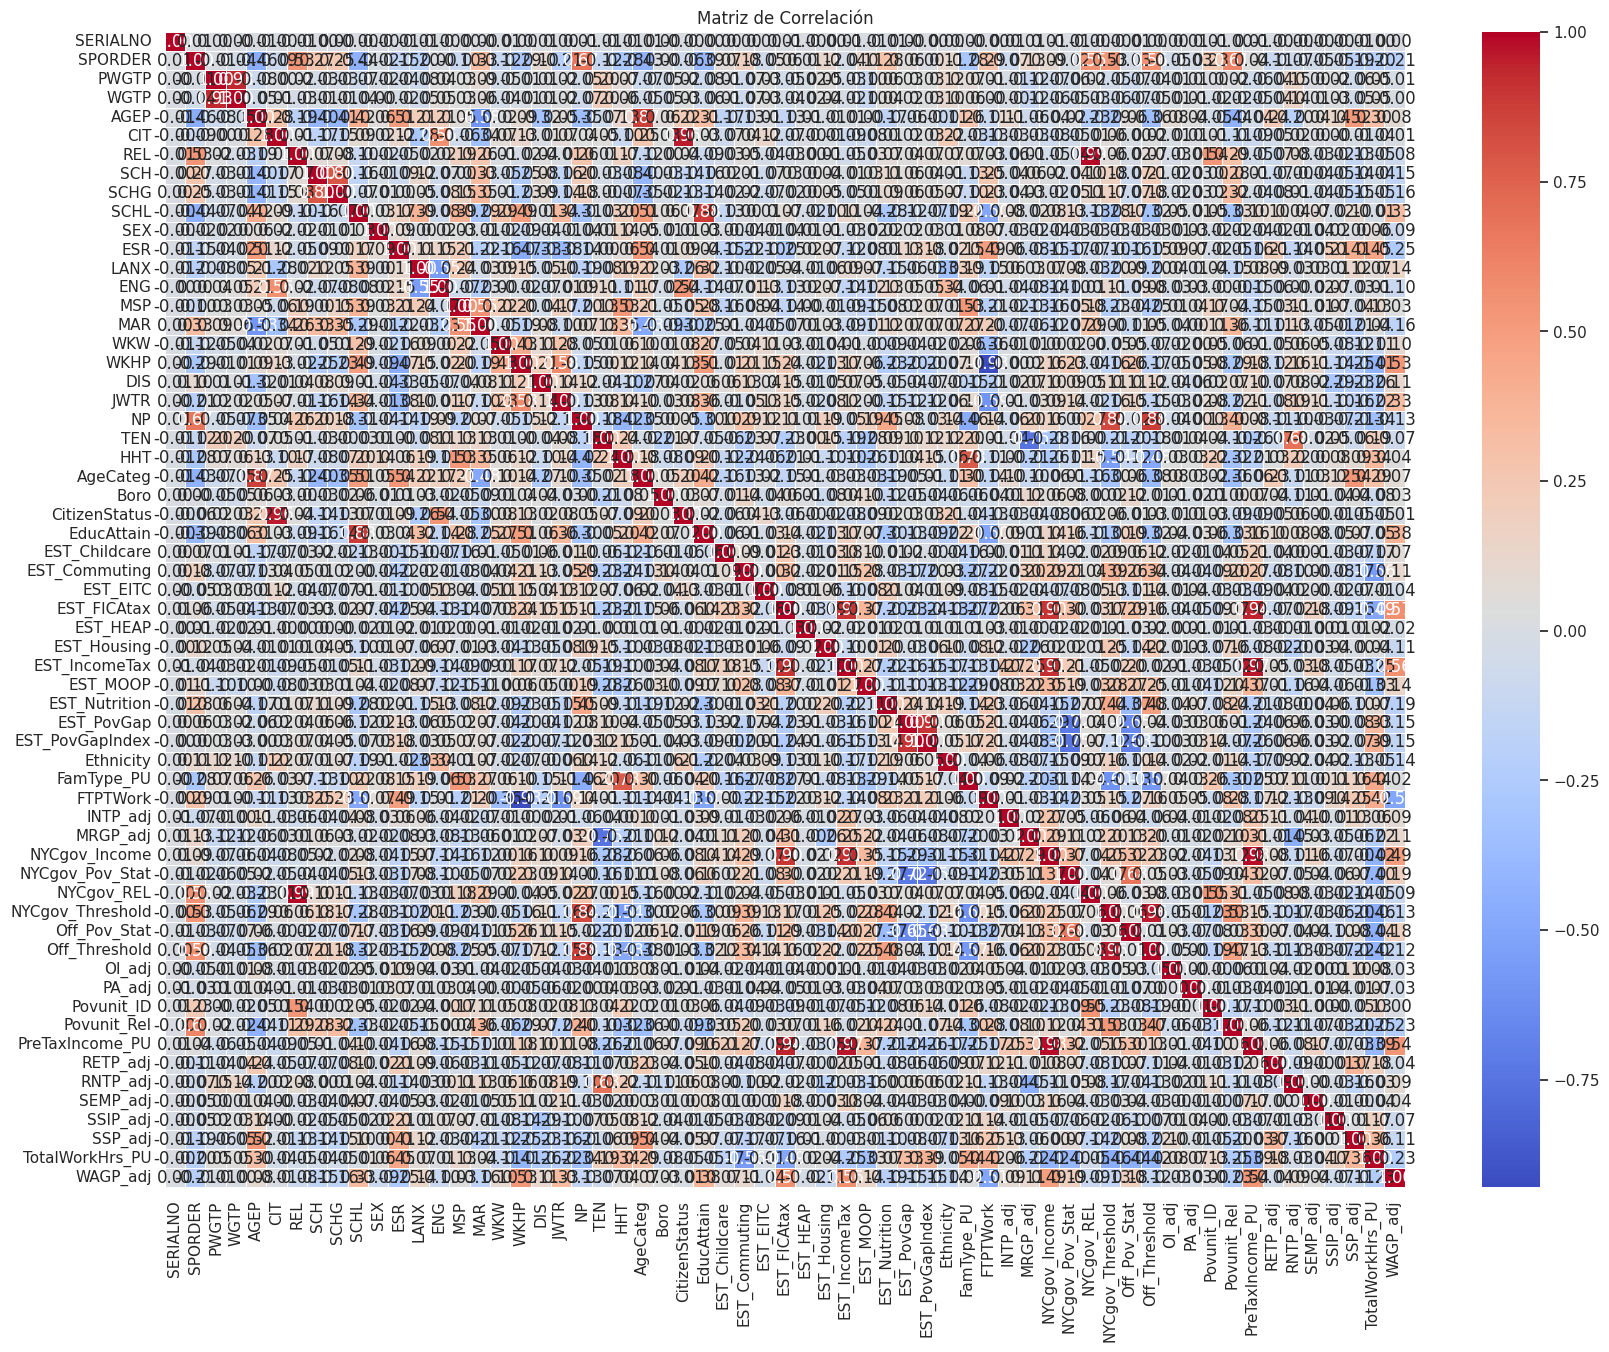

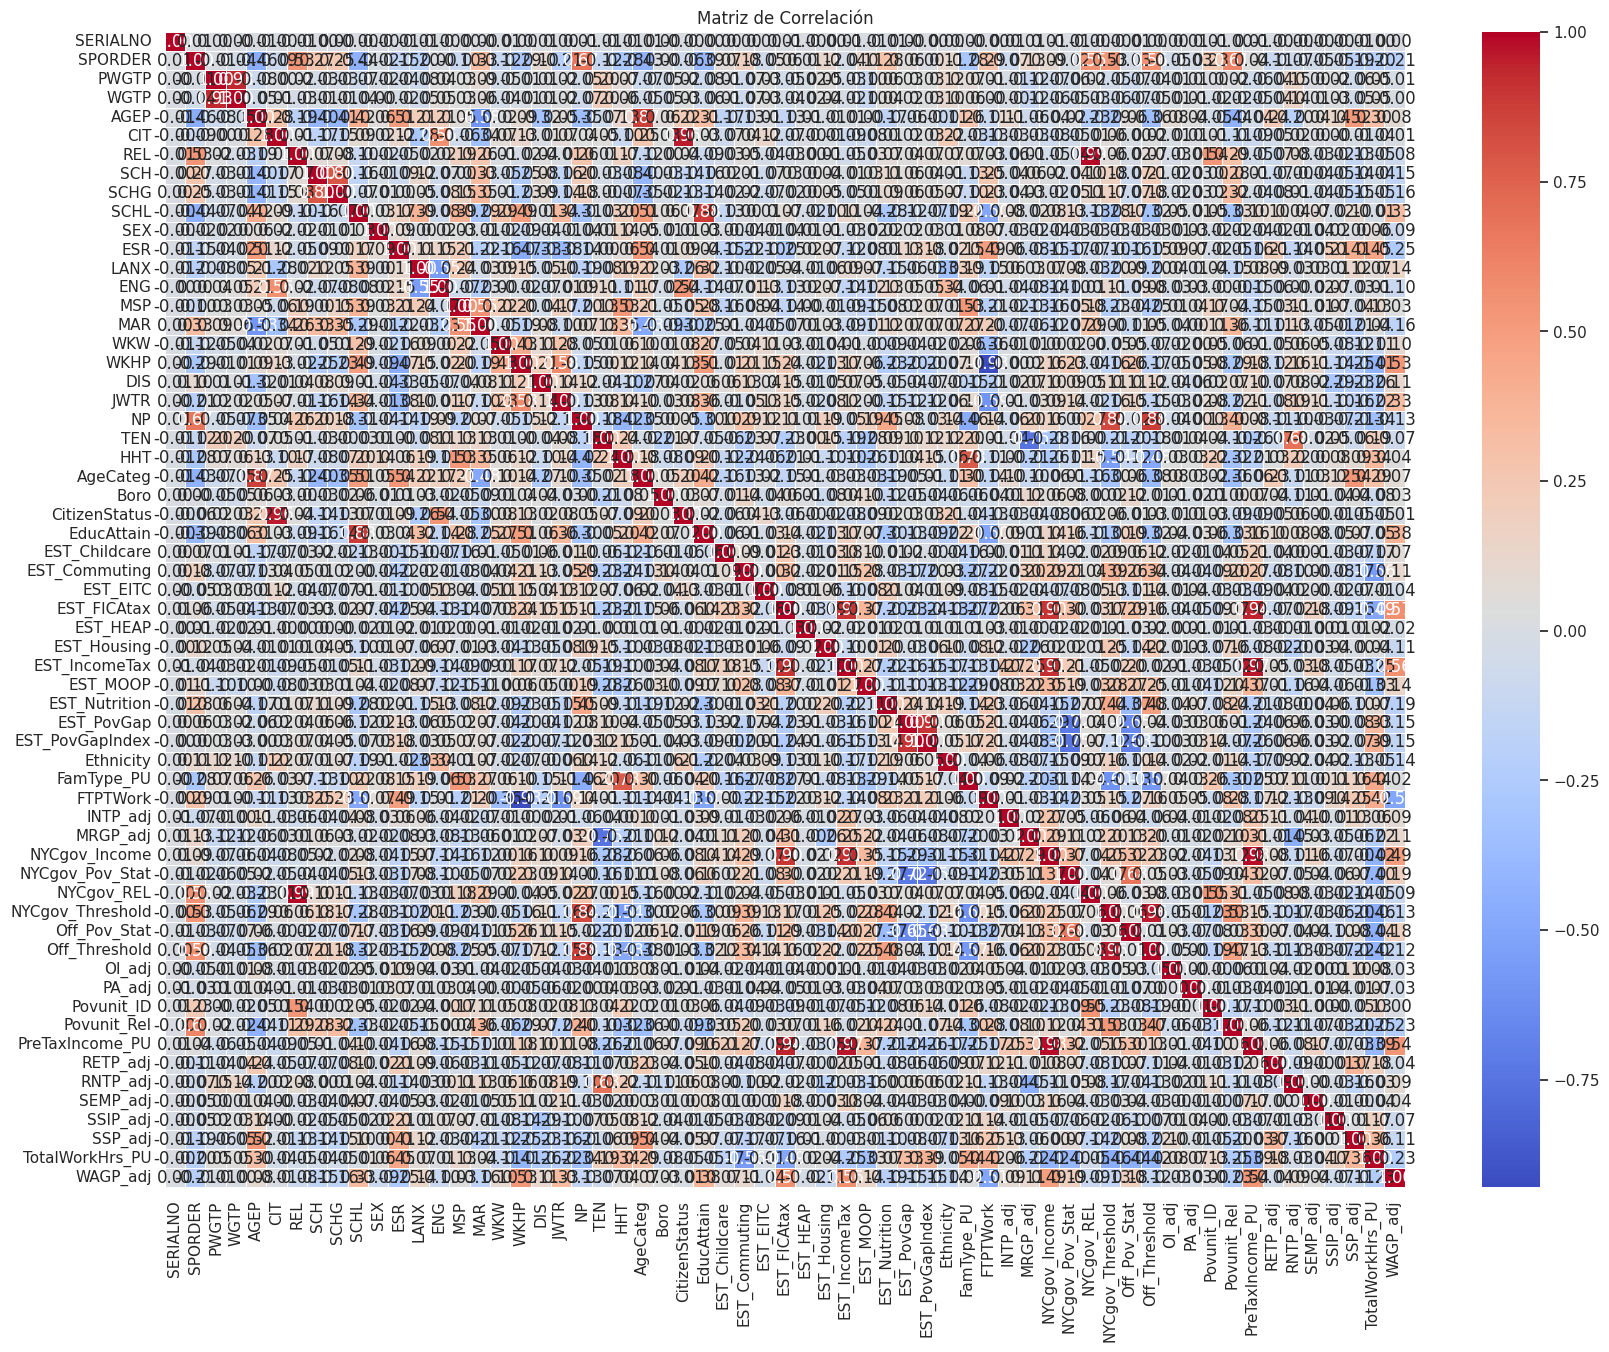

In [ ]:
# Selecciona solo las columnas numéricas para la matriz de correlación
df2_numeric = df2.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
corr_matrix = df2_numeric.corr()

# Configura el estilo de Seaborn
sns.set(style="white")

# Configura el tamaño de la figura
plt.figure(figsize=(20, 15))

# Dibuja el mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Ajusta el diseño y muestra la figura
plt.title("Matriz de Correlación")
plt.show()

###Eliminación de variables altamente correlacionadas

**Umbral de correlación**
> - El umbral de correlación se elige para identificar qué tan fuertemente dos variables están relacionadas entre sí. Un umbral más alto significa que solo las correlaciones muy fuertes se tendrán en cuenta.
> - Elegir un umbral demasiado bajo podría resultar en la retención de muchas variables redundantes, lo que podría afectar negativamente el rendimiento del modelo debido a la multicolinealidad.
> - Elegir un umbral demasiado alto podría llevar a la eliminación de variables útiles, lo que también puede afectar negativamente la calidad del modelo.
> - Un umbral comúnmente utilizado es 0.7, pero la elección puede depender del contexto y del conocimiento del dominio.

**Eliminación de Variables Fuertemente Correlacionadas**
> - Variables altamente correlacionadas pueden introducir multicolinealidad en el modelo, lo que dificulta la interpretación de la importancia individual de cada variable.
> - La multicolinealidad también puede afectar la estabilidad del modelo y hacer que los coeficientes estimados sean muy sensibles a pequeños cambios en los datos.
> - Al eliminar variables altamente correlacionadas, se mejora la interpretación del modelo y se reduce la complejidad del conjunto de características.
> - Esto también puede ayudar a prevenir el sobreajuste al reducir la redundancia de la información proporcionada por múltiples variables similares.

In [ ]:
# Crear un umbral de correlación (0.7 en este caso)
correlation_threshold = 0.7

# Calcular la matriz de correlación
corr_matrix = df2.corr()

# Obtener la lista de pares de columnas con correlación alta
high_correlation_pairs = []
num_cols = len(df2.columns)

for i in range(num_cols):
    for j in range(i + 1, num_cols):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= correlation_threshold:
            high_correlation_pairs.append((df2.columns[i], df2.columns[j]))

# Crear una lista de columnas a eliminar
columns_to_remove = set()
for col1, col2 in high_correlation_pairs:
    columns_to_remove.add(col2)

# Seleccionar las columnas que no deben eliminarse
columns_to_keep = [col_name for col_name in df2.columns if col_name not in columns_to_remove]

# Actualizar el DataFrame con las columnas seleccionadas y renombrar a "modelo2"
modelo2 = df2[columns_to_keep]

# Mostrar el DataFrame resultante
modelo2.head()


SERIALNO  SPORDER  PWGTP  AGEP  CIT  REL  SCH  SCHL  SEX  ESR  ...  PA_adj  \
0         1        1     95    31    1    0    1  22.0    2  1.0  ...     0.0   
1        16        1    181    63    1    0    1  22.0    2  1.0  ...     0.0   
2        16        2    210    65    1    1    1  19.0    1  6.0  ...     0.0   
3        47        1     62    68    4    0    1   1.0    1  1.0  ...     0.0   
4        47        2     71    63    4    1    1   1.0    2  1.0  ...     0.0   

   Povunit_ID  Povunit_Rel  RETP_adj  RNTP_adj  SEMP_adj  SSIP_adj    SSP_adj  \
0           1            1       0.0       0.0       0.0       0.0      0.000   
1           1            1       0.0       0.0       0.0       0.0      0.000   
2           1            2       0.0       0.0       0.0       0.0  12157.164   
3           1            1       0.0       0.0       0.0       0.0  27353.619   
4           1            2       0.0       0.0       0.0       0.0      0.000   

   TotalWorkHrs_PU    WAGP_adj  
0                2  127650.220  
1                2  182357.450  
2                2       0.000  
3                1   91178.727  
4                1   36471.492  

[5 rows x 45 columns]

SERIALNO  SPORDER  PWGTP  AGEP  CIT  REL  SCH  SCHL  SEX  ESR  ...  PA_adj  \
0         1        1     95    31    1    0    1  22.0    2  1.0  ...     0.0   
1        16        1    181    63    1    0    1  22.0    2  1.0  ...     0.0   
2        16        2    210    65    1    1    1  19.0    1  6.0  ...     0.0   
3        47        1     62    68    4    0    1   1.0    1  1.0  ...     0.0   
4        47        2     71    63    4    1    1   1.0    2  1.0  ...     0.0   

   Povunit_ID  Povunit_Rel  RETP_adj  RNTP_adj  SEMP_adj  SSIP_adj    SSP_adj  \
0           1            1       0.0       0.0       0.0       0.0      0.000   
1           1            1       0.0       0.0       0.0       0.0      0.000   
2           1            2       0.0       0.0       0.0       0.0  12157.164   
3           1            1       0.0       0.0       0.0       0.0  27353.619   
4           1            2       0.0       0.0       0.0       0.0      0.000   

   TotalWorkHrs_PU    WAGP_adj  
0                2  127650.220  
1                2  182357.450  
2                2       0.000  
3                1   91178.727  
4                1   36471.492  

[5 rows x 45 columns]


En la exploración de las correlaciones entre las columnas del conjunto de datos, hemos identificado múltiples pares de variables que están altamente correlacionadas, con un umbral de correlación de 0.7 o superior. Estas son las columnas en parejas altamente correlacionadas:

> * ('PWGTP', 'WGTP')
> * ('CIT', 'CitizenStatus')
> * ('REL', 'NYCgov_REL')
> * ('SCH', 'SCHG')
> * ('SCHL', 'EducAttain')
> * ('MSP', 'MAR')
> * ('NP', 'NYCgov_Threshold')
> * ('NP', 'Off_Threshold')
> * ('TEN', 'MRGP_adj')
> * ('TEN', 'RNTP_adj')
> * ('HHT', 'FamType_PU')
> * ('EST_FICAtax', 'EST_IncomeTax')
> * ('EST_FICAtax', 'NYCgov_Income')
> * ('EST_FICAtax', 'PreTaxIncome_PU')
> * ('EST_FICAtax', 'WAGP_adj')
> * ('EST_IncomeTax', 'NYCgov_Income')
> * ('EST_IncomeTax', 'PreTaxIncome_PU')
> * ('EST_IncomeTax', 'WAGP_adj')
> * ('EST_PovGap', 'EST_PovGapIndex')
> * ('EST_PovGap', 'NYCgov_Pov_Stat')
> * ('EST_PovGapIndex', 'NYCgov_Pov_Stat')
> * ('NYCgov_Income', 'PreTaxIncome_PU')
> * ('NYCgov_Threshold', 'Off_Threshold')
> * ('PreTaxIncome_PU', 'WAGP_adj')

Para reducir la redundancia y eliminar la multicolinealidad, hemos eliminado una de las columnas de cada par altamente correlacionado. Estas son las columnas que hemos eliminado:

> * 'EST_IncomeTax'
> * 'EST_PovGapIndex'
> * 'FamType_PU'
> * 'NYCgov_Income'
> * 'NYCgov_REL'
> * 'EducAttain'
> * 'Off_Threshold'
> * 'CitizenStatus'
> * 'WGTP'
> * 'PreTaxIncome_PU'
> * 'WAGP_adj'
> * 'MAR'
> * 'MRGP_adj'
> * 'NYCgov_Pov_Stat'
> * 'NYCgov_Threshold'
> * 'SCHG'
> * 'RNTP_adj'

Este proceso de eliminación de columnas altamente correlacionadas ayudará a simplificar el conjunto de datos, reducir la redundancia y permitir un análisis más efectivo de los datos restantes.

### Normalización del modelo 2

Se hace uso del dataframe *modelo2* ya que este es el que tiene aplicada la eliminaciónd e vairables fuertemente correlacionadas

In [ ]:
# Definir las columnas numéricas en el modelo2
columnas_numericas = modelo2.select_dtypes(include=['float64', 'int64']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Normalizar las variables numéricas en el modelo2
modelo2[columnas_numericas] = scaler.fit_transform(modelo2[columnas_numericas])

# Mostrar el modelo2 normalizado
modelo2.head()

<ipython-input-42-e2b4aae2480c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SERIALNO   SPORDER     PWGTP      AGEP       CIT       REL       SCH  \
0 -1.733512 -0.826273 -0.286502 -0.383161 -0.806469 -0.656541 -0.431781   
1 -1.733475 -0.826273  0.684528  1.034762 -0.806469 -0.656541 -0.431781   
2 -1.733475 -0.196061  1.011969  1.123382 -0.806469 -0.384441 -0.431781   
3 -1.733399 -0.826273 -0.659107  1.256312  1.010075 -0.656541 -0.431781   
4 -1.733399 -0.196061 -0.557488  1.034762  1.010075 -0.384441 -0.431781   

       SCHL       SEX       ESR  ...    PA_adj  Povunit_ID  Povunit_Rel  \
0  0.968733  0.938675 -0.575139  ... -0.089757   -0.191493    -0.972690   
1  0.968733  0.938675 -0.575139  ... -0.089757   -0.191493    -0.972690   
2  0.511538 -1.065332  1.495701  ... -0.089757   -0.191493    -0.117275   
3 -2.231634 -1.065332 -0.575139  ... -0.089757   -0.191493    -0.972690   
4 -2.231634  0.938675 -0.575139  ... -0.089757   -0.191493    -0.117275   

   RETP_adj  RNTP_adj  SEMP_adj  SSIP_adj   SSP_adj  TotalWorkHrs_PU  WAGP_adj  
0 -0.175344 -0.864569 -0.105819 -0.160738 -0.351962        -0.331834  1.377831  
1 -0.175344 -0.864569 -0.105819 -0.160738 -0.351962        -0.331834  2.171554  
2 -0.175344 -0.864569 -0.105819 -0.160738  1.703179        -0.331834 -0.474191  
3 -0.175344 -0.864569 -0.105819 -0.160738  4.272105        -1.026038  0.848682  
4 -0.175344 -0.864569 -0.105819 -0.160738 -0.351962        -1.026038  0.054958  

[5 rows x 45 columns]

<ipython-input-91-e2b4aae2480c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SERIALNO   SPORDER     PWGTP      AGEP       CIT       REL       SCH  \
0 -1.733512 -0.826273 -0.286502 -0.383161 -0.806469 -0.656541 -0.431781   
1 -1.733475 -0.826273  0.684528  1.034762 -0.806469 -0.656541 -0.431781   
2 -1.733475 -0.196061  1.011969  1.123382 -0.806469 -0.384441 -0.431781   
3 -1.733399 -0.826273 -0.659107  1.256312  1.010075 -0.656541 -0.431781   
4 -1.733399 -0.196061 -0.557488  1.034762  1.010075 -0.384441 -0.431781   

       SCHL       SEX       ESR  ...    PA_adj  Povunit_ID  Povunit_Rel  \
0  0.968733  0.938675 -0.575139  ... -0.089757   -0.191493    -0.972690   
1  0.968733  0.938675 -0.575139  ... -0.089757   -0.191493    -0.972690   
2  0.511538 -1.065332  1.495701  ... -0.089757   -0.191493    -0.117275   
3 -2.231634 -1.065332 -0.575139  ... -0.089757   -0.191493    -0.972690   
4 -2.231634  0.938675 -0.575139  ... -0.089757   -0.191493    -0.117275   

   RETP_adj  RNTP_adj  SEMP_adj  SSIP_adj   SSP_adj  TotalWorkHrs_PU  WAGP_adj  
0 -0.175344 -0.864569 -0.105819 -0.160738 -0.351962        -0.331834  1.377831  
1 -0.175344 -0.864569 -0.105819 -0.160738 -0.351962        -0.331834  2.171554  
2 -0.175344 -0.864569 -0.105819 -0.160738  1.703179        -0.331834 -0.474191  
3 -0.175344 -0.864569 -0.105819 -0.160738  4.272105        -1.026038  0.848682  
4 -0.175344 -0.864569 -0.105819 -0.160738 -0.351962        -1.026038  0.054958  

[5 rows x 45 columns]

### Resumen estadístico del modelo 2

In [ ]:
# Generar un resumen estadístico
summary = modelo2.describe()

# Mostrar el resumen estadístico
print(summary)

           SERIALNO       SPORDER         PWGTP          AGEP           CIT  \
count  6.827300e+04  6.827300e+04  6.827300e+04  6.827300e+04  6.827300e+04   
mean   5.328576e-17  7.410051e-17  2.643473e-17  8.284271e-17 -1.419566e-16   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00   
min   -1.733512e+00 -8.262729e-01 -1.234951e+00 -1.756774e+00 -8.064693e-01   
25%   -8.632047e-01 -8.262729e-01 -6.478159e-01 -7.819521e-01 -8.064693e-01   
50%    3.165608e-04 -1.960613e-01 -2.977933e-01 -7.299064e-02 -8.064693e-01   
75%    8.715725e-01  4.341503e-01  3.232145e-01  7.689011e-01  1.010075e+00   
max    1.726159e+00  1.114775e+01  1.557743e+01  2.452685e+00  1.615590e+00   

                REL           SCH          SCHL           SEX           ESR  \
count  6.827300e+04  6.827300e+04  6.827300e+04  6.827300e+04  6.827300e+04   
mean   1.035534e-17 -1.022004e-16  2.716325e-17  1.508029e-16 -7.238330e-17   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.

Aquí hay algunas observaciones y conclusiones generales que se pueden extraer del resumen estadistico:

> - Media y Desviación Estándar:
   - Las medias de todas las variables son cercanas a cero, lo que sugiere que, en promedio, los valores se distribuyen alrededor de cero.
   - Las desviaciones estándar son todas iguales a uno, lo que indica que las variables han sido escaladas o estandarizadas.
> - Distribución:
   - Las variables tienen diferentes escalas, ya que los valores mínimos y máximos varían significativamente entre ellas.
> - Dispersión de los Datos:
   - La diferencia entre el valor mínimo y máximo para cada variable puede ser considerable. Por ejemplo, en la variable `SPORDER`, el rango va desde aproximadamente -0.8 hasta más de 11.
> - Asimetría:
   - No se proporciona información directa sobre la asimetría de los datos, pero la media cercana a cero sugiere que la distribución de los datos puede ser simétrica.
> - Cuantiles:
   - Los cuantiles (percentiles 25%, 50%, y 75%) indican la dispersión de los datos y muestran que la mayoría de los datos se concentran en ciertos rangos.
> - Normalización de Datos:
   - La normalización de los datos puede ser una razón para la estandarización, ya que todas las variables tienen una media cercana a cero y una desviación estándar de uno.

## Dataset 3 ~ Indice vehicular

### Matriz de correlación

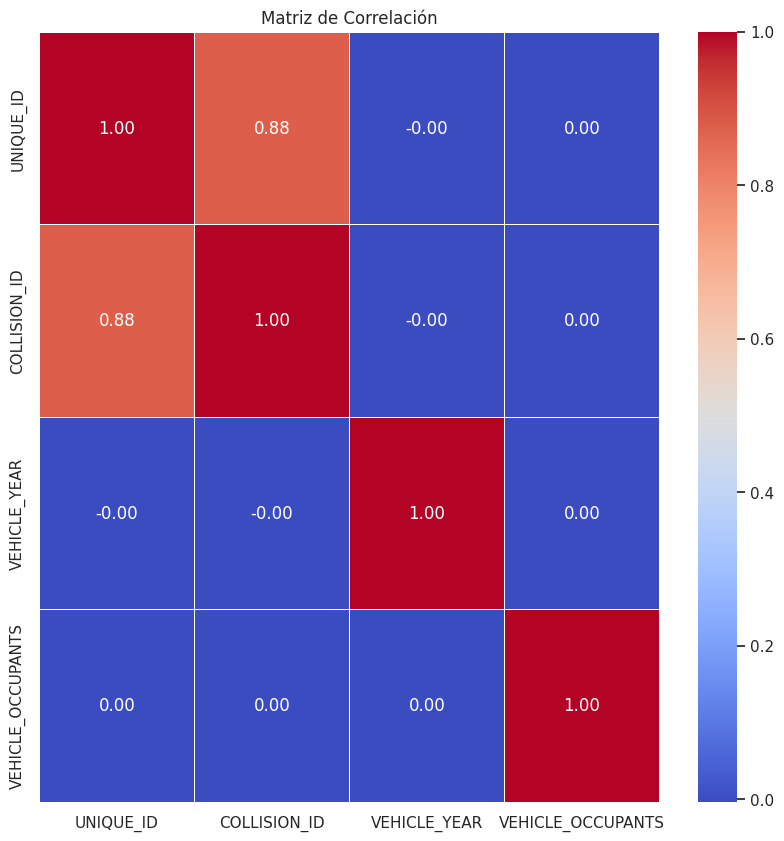

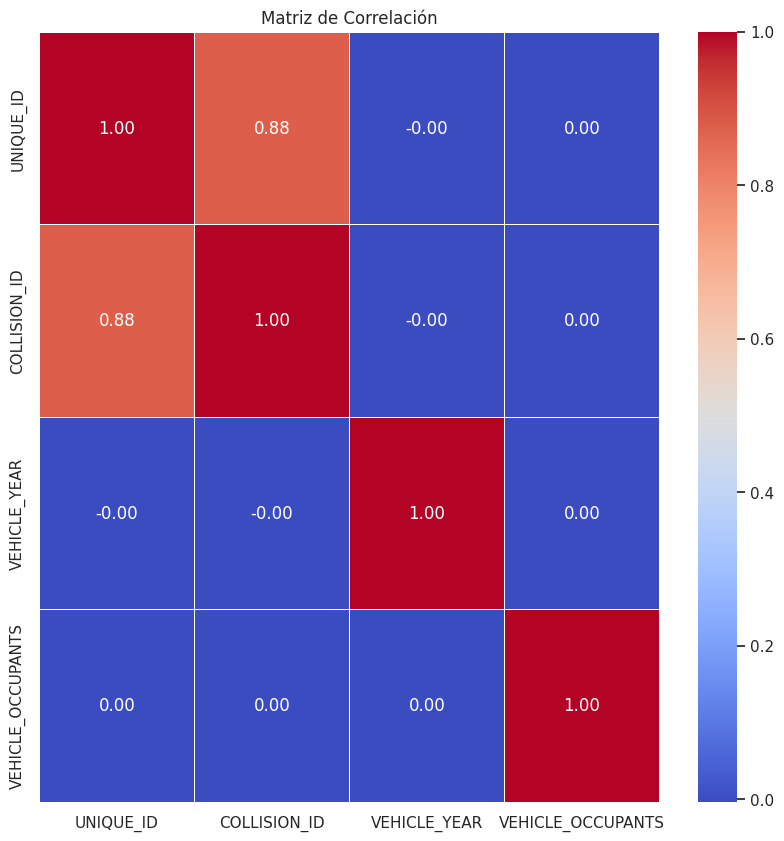

In [ ]:
# Selecciona solo las columnas numéricas para la matriz de correlación
df3_numeric = df3.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
corr_matrix = df3_numeric.corr()

# Configura el estilo de Seaborn
sns.set(style="white")

# Configura el tamaño de la figura
plt.figure(figsize=(10, 10))

# Dibuja el mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Ajusta el diseño y muestra la figura
plt.title("Matriz de Correlación")
plt.show()

**Observaciones de la matriz de correlación**

Se puede evidenciar que las variables *UNIQUE_ID* y *COLLISION_ID*, son las únicas que muestran una relación muy fuerte, y teniendo en cuenta que a primera vista son variables que no necesitamos para el análisis del contexto del problema, las podemos eliminar sin problema.

### Normalización del modelo 3

In [ ]:
#Definición de modelo3
modelo3 = df3

# Definir las columnas numéricas en el modelo3
columnas_numericas = modelo3.select_dtypes(include=['float64', 'int64']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Normalizar las variables numéricas en el modelo3
modelo3[columnas_numericas] = scaler.fit_transform(modelo3[columnas_numericas])

# Mostrar el modelo3 normalizado
modelo3.head()

UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0  -1.748925     -1.936989  09/07/2012       9:03   
1   0.949129      0.813476  09/23/2019       8:15   
2  -0.361559      0.207945  10/02/2015      17:18   
3  -0.360910      0.208671  10/04/2015      20:34   
4  -0.511757     -1.804936  04/25/2013      21:15   

                             VEHICLE_ID STATE_REGISTRATION  \
0                                     1                 NY   
1  0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
2                                     2                 NY   
3                                     1                 NY   
4                                     1                 NY   

                          VEHICLE_TYPE   VEHICLE_MAKE VEHICLE_MODEL  \
0                    PASSENGER VEHICLE            NaN           NaN   
1  Station Wagon/Sport Utility Vehicle  TOYT -CAR/SUV           NaN   
2                                 TAXI            NaN           NaN   
3                    PASSENGER VEHICLE            NaN           NaN   
4                    PASSENGER VEHICLE            NaN           NaN   

   VEHICLE_YEAR  ...             PRE_CRASH    POINT_OF_IMPACT  \
0           NaN  ...                   NaN                NaN   
1     -0.082541  ...  Going Straight Ahead  Left Front Bumper   
2           NaN  ...  Going Straight Ahead                NaN   
3           NaN  ...                Parked                NaN   
4           NaN  ...                   NaN                NaN   

             VEHICLE_DAMAGE VEHICLE_DAMAGE_1 VEHICLE_DAMAGE_2  \
0                       NaN              NaN              NaN   
1  Left Front Quarter Panel              NaN              NaN   
2                       NaN              NaN              NaN   
3                       NaN              NaN              NaN   
4                       NaN              NaN              NaN   

  VEHICLE_DAMAGE_3 PUBLIC_PROPERTY_DAMAGE PUBLIC_PROPERTY_DAMAGE_TYPE  \
0              NaN                    NaN                         NaN   
1              NaN                      N                         NaN   
2              NaN                    NaN                         NaN   
3              NaN                    NaN                         NaN   
4              NaN                    NaN                         NaN   

            CONTRIBUTING_FACTOR_1 CONTRIBUTING_FACTOR_2  
0                     Unspecified                   NaN  
1  Driver Inattention/Distraction           Unspecified  
2  Driver Inattention/Distraction                   NaN  
3                     Unspecified                   NaN  
4                 Other Vehicular                   NaN  

[5 rows x 25 columns]

UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
0  -1.748925     -1.936989  09/07/2012       9:03   
1   0.949129      0.813476  09/23/2019       8:15   
2  -0.361559      0.207945  10/02/2015      17:18   
3  -0.360910      0.208671  10/04/2015      20:34   
4  -0.511757     -1.804936  04/25/2013      21:15   

                             VEHICLE_ID STATE_REGISTRATION  \
0                                     1                 NY   
1  0553ab4d-9500-4cba-8d98-f4d7f89d5856                 NY   
2                                     2                 NY   
3                                     1                 NY   
4                                     1                 NY   

                          VEHICLE_TYPE   VEHICLE_MAKE VEHICLE_MODEL  \
0                    PASSENGER VEHICLE            NaN           NaN   
1  Station Wagon/Sport Utility Vehicle  TOYT -CAR/SUV           NaN   
2                                 TAXI            NaN           NaN   
3                    PASSENGER VEHICLE            NaN           NaN   
4                    PASSENGER VEHICLE            NaN           NaN   

   VEHICLE_YEAR  ...             PRE_CRASH    POINT_OF_IMPACT  \
0           NaN  ...                   NaN                NaN   
1     -0.082541  ...  Going Straight Ahead  Left Front Bumper   
2           NaN  ...  Going Straight Ahead                NaN   
3           NaN  ...                Parked                NaN   
4           NaN  ...                   NaN                NaN   

             VEHICLE_DAMAGE VEHICLE_DAMAGE_1 VEHICLE_DAMAGE_2  \
0                       NaN              NaN              NaN   
1  Left Front Quarter Panel              NaN              NaN   
2                       NaN              NaN              NaN   
3                       NaN              NaN              NaN   
4                       NaN              NaN              NaN   

  VEHICLE_DAMAGE_3 PUBLIC_PROPERTY_DAMAGE PUBLIC_PROPERTY_DAMAGE_TYPE  \
0              NaN                    NaN                         NaN   
1              NaN                      N                         NaN   
2              NaN                    NaN                         NaN   
3              NaN                    NaN                         NaN   
4              NaN                    NaN                         NaN   

            CONTRIBUTING_FACTOR_1 CONTRIBUTING_FACTOR_2  
0                     Unspecified                   NaN  
1  Driver Inattention/Distraction           Unspecified  
2  Driver Inattention/Distraction                   NaN  
3                     Unspecified                   NaN  
4                 Other Vehicular                   NaN  

[5 rows x 25 columns]

### Resumen estadístico del modelo 3

In [ ]:
# Generar un resumen estadístico
summary = modelo3.describe()

# Mostrar el resumen estadístico
print(summary)

          UNIQUE_ID  COLLISION_ID  VEHICLE_YEAR  VEHICLE_OCCUPANTS
count  3.704406e+06  3.704406e+06  1.907435e+06       1.986000e+06
mean   3.891445e-17  1.509930e-17  2.746718e-16      -2.025905e-19
std    1.000000e+00  1.000000e+00  1.000000e+00       1.000000e+00
min   -4.915142e+00 -2.003983e+00 -6.540778e+00      -1.015904e-03
25%   -5.688031e-01  1.417333e-02 -4.386941e-02      -1.014898e-03
50%    3.837361e-01  3.814573e-01 -1.164268e-02      -1.014898e-03
75%    8.253972e-01  6.898002e-01  7.693356e-03      -1.014898e-03
max    1.251454e+00  9.947822e-01  1.163268e+02       1.005455e+03
          UNIQUE_ID  COLLISION_ID  VEHICLE_YEAR  VEHICLE_OCCUPANTS
count  3.704406e+06  3.704406e+06  1.907435e+06       1.986000e+06
mean   3.891445e-17  1.509930e-17  2.746718e-16      -2.025905e-19
std    1.000000e+00  1.000000e+00  1.000000e+00       1.000000e+00
min   -4.915142e+00 -2.003983e+00 -6.540778e+00      -1.015904e-03
25%   -5.688031e-01  1.417333e-02 -4.386941e-02      -1.014898

Este resumen estadístico proporciona información clave sobre cuatro variables del conjunto de datos. Aquí están algunas observaciones y conclusiones que se pueden extraer:

> - UNIQUE_ID y COLLISION_ID:
   - La media de ambos es muy cercana a cero, lo que indica que no hay un sesgo significativo en los valores.
   - La desviación estándar de ambos es aproximadamente 1, lo que sugiere que la dispersión de los datos alrededor de la media es bastante uniforme.
> - VEHICLE_YEAR:
   - La media cercana a cero indica que, en promedio, los años de los vehículos no tienen un sesgo significativo.
   - La desviación estándar de 1 sugiere que la variabilidad en los años de los vehículos es considerable.
> - VEHICLE_OCCUPANTS:
   - La media cercana a cero indica que, en promedio, hay pocos ocupantes en los vehículos.
   - La desviación estándar de 1 sugiere que la variabilidad en la cantidad de ocupantes es considerable.
> - Valores Mínimos y Máximos:
   - Se observa un valor mínimo negativo para COLLISION_ID, lo que puede requerir una verificación, ya que generalmente los IDs no deberían ser negativos.
   - La variable VEHICLE_YEAR tiene un valor máximo significativamente alto en comparación con su media y cuartiles, lo que podría indicar presencia de outliers o errores en los datos.
   - Similarmente, la variable VEHICLE_OCCUPANTS tiene un valor máximo muy alto en comparación con la media y cuartiles, lo que sugiere la posibilidad de outliers o errores en la recopilación de datos.
> - Cuartiles:
   - Los cuartiles proporcionan información sobre la distribución de los datos. Por ejemplo, en VEHICLE_OCCUPANTS, el tercer cuartil es negativo, lo cual puede ser un indicador de un problema en los datos.

## Dataset 4 ~ Indicesal

### Matriz de correlación

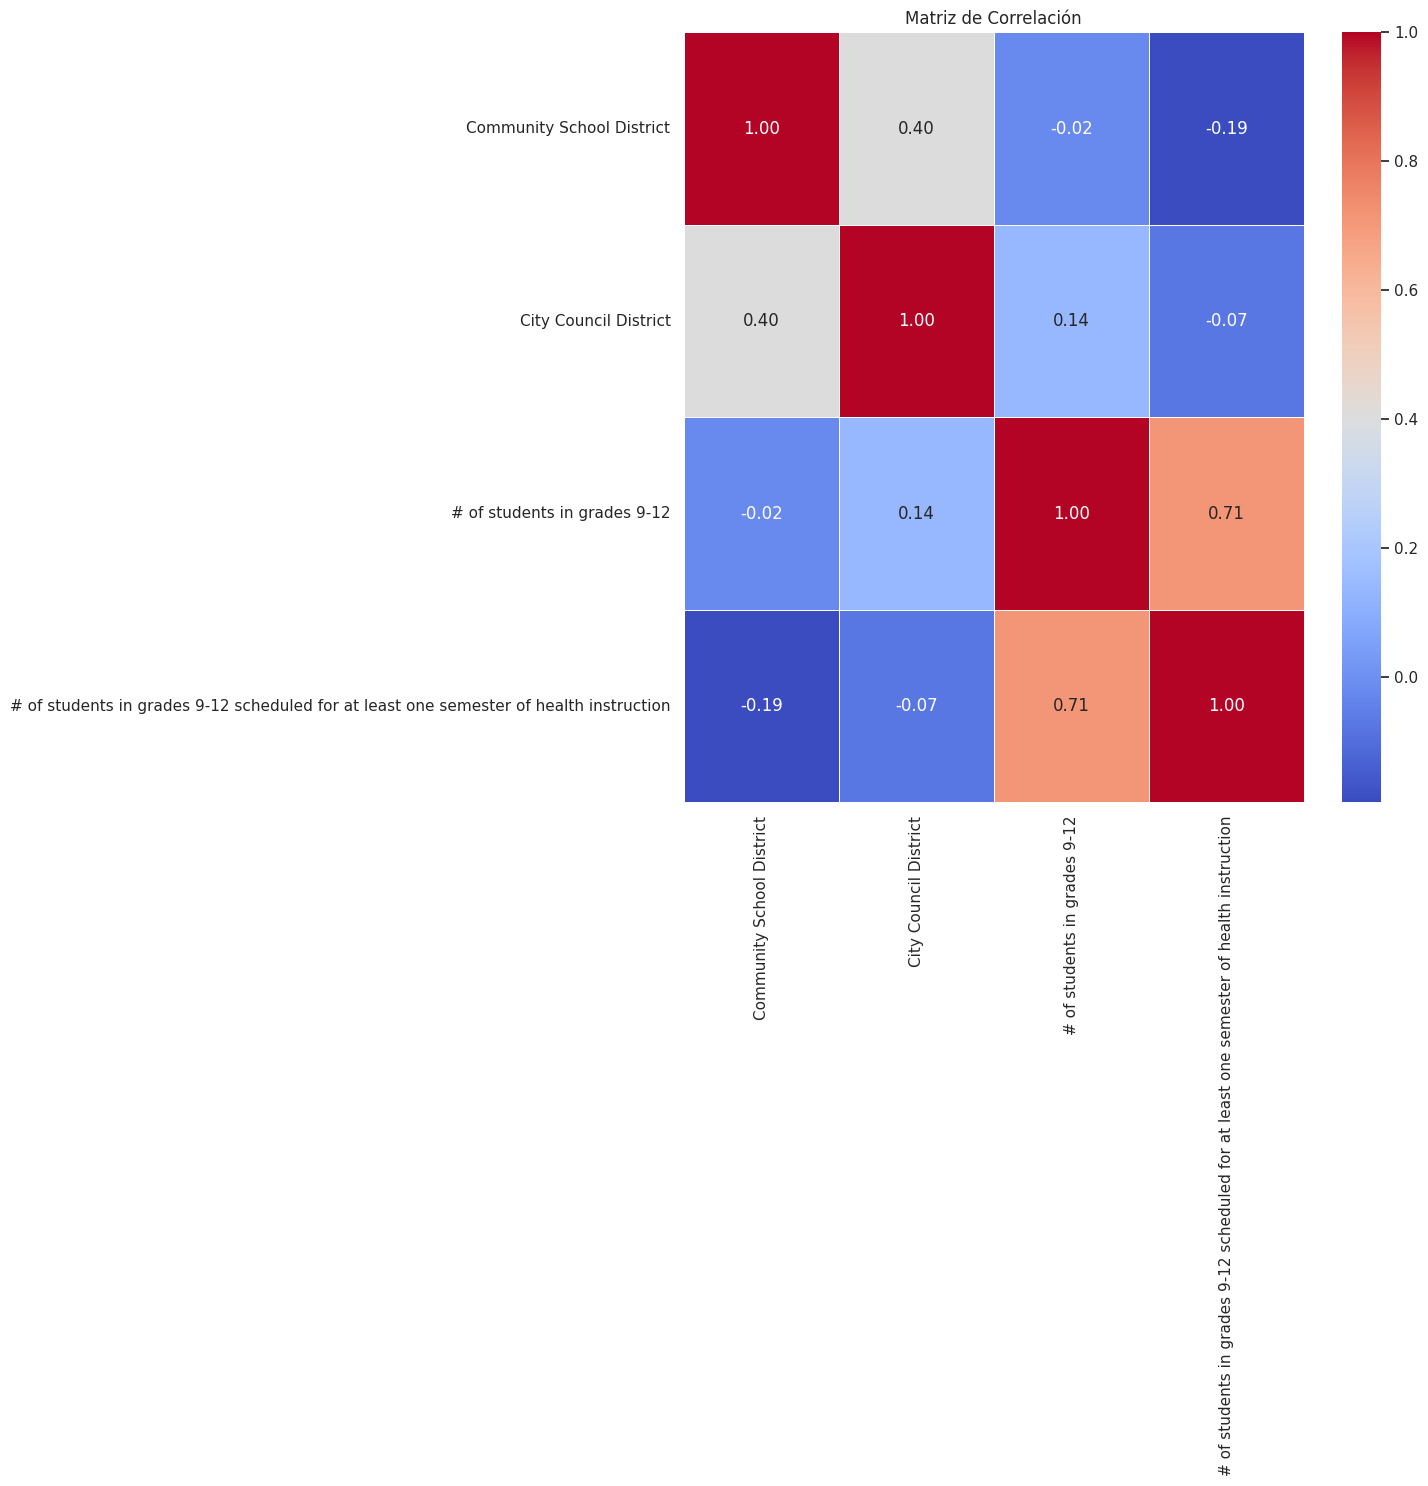

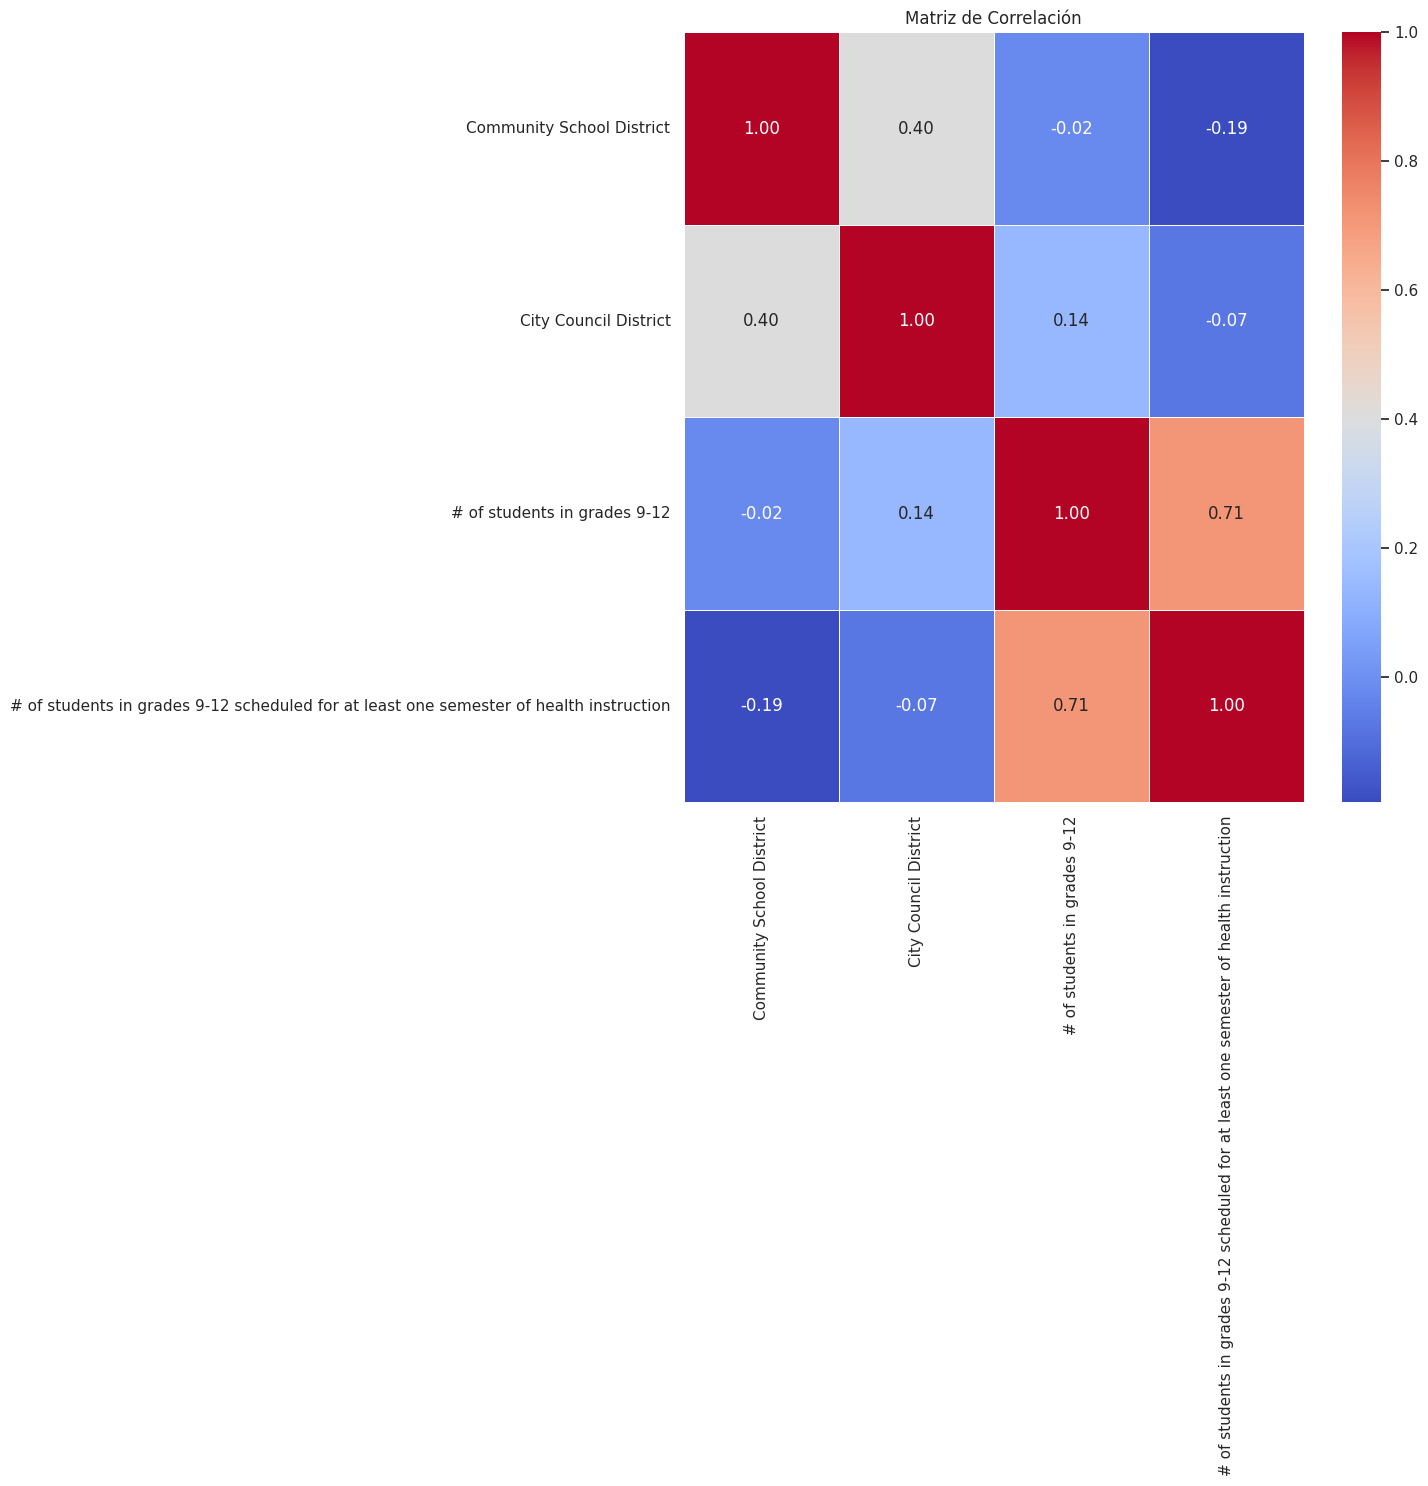

In [ ]:
# Selecciona solo las columnas numéricas para la matriz de correlación
df4_numeric = df4.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
corr_matrix = df4_numeric.corr()

# Configura el estilo de Seaborn
sns.set(style="white")

# Configura el tamaño de la figura
plt.figure(figsize=(10, 10))

# Dibuja el mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Ajusta el diseño y muestra la figura
plt.title("Matriz de Correlación")
plt.show()

### Normalización del modelo 4

In [ ]:
#Definición de modelo4
modelo4 = df4

# Definir las columnas numéricas en el modelo4
columnas_numericas = modelo4.select_dtypes(include=['float64', 'int64']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Normalizar las variables numéricas en el modelo4
modelo4[columnas_numericas] = scaler.fit_transform(modelo4[columnas_numericas])

# Mostrar el modelo4 normalizado
modelo4.head()

School DBN  Community School District  City Council District  \
0     02M394                  -0.885414              -1.424645   
1     02M551                  -0.885414              -1.424645   
2     02M294                  -0.885414              -1.424645   
3     01M458                  -0.938712              -1.424645   
4     02M280                  -0.885414              -1.424645   

                                      School Name  \
0                        Emma Lazarus High School   
1           Urban Assembly New York Harbor School   
2                            Essex Street Academy   
3                       Forsyth Satellite Academy   
4  Manhattan Early College School for Advertising   

   # of students in grades 9-12  \
0                     -0.357722   
1                     -0.176006   
2                     -0.326243   
3                     -0.565192   
4                     -0.413524   

   # of students in grades 9-12 scheduled for at least one semester of health instruction  \
0                                          -0.348719                                        
1                                           0.947869                                        
2                                          -0.213255                                        
3                                          -0.826070                                        
4                                          -1.090548                                        

       % # of 16-17 June and August graduates  \
0  71.2%                                   33   
1  96.8%                                   70   
2  72.9%                                   69   
3  89.4%                                    s   
4  38.6%                                    s   

  # of 16-17 June and August graduates meeting high school health requirements  \
0                                                 33                             
1                                                 70                             
2                                                 69                             
3                                                  s                             
4                                                  s                             

      % 1  
0  100.0%  
1  100.0%  
2  100.0%  
3       s  
4       s

School DBN  Community School District  City Council District  \
0     02M394                  -0.885414              -1.424645   
1     02M551                  -0.885414              -1.424645   
2     02M294                  -0.885414              -1.424645   
3     01M458                  -0.938712              -1.424645   
4     02M280                  -0.885414              -1.424645   

                                      School Name  \
0                        Emma Lazarus High School   
1           Urban Assembly New York Harbor School   
2                            Essex Street Academy   
3                       Forsyth Satellite Academy   
4  Manhattan Early College School for Advertising   

   # of students in grades 9-12  \
0                     -0.357722   
1                     -0.176006   
2                     -0.326243   
3                     -0.565192   
4                     -0.413524   

   # of students in grades 9-12 scheduled for at least one semester of health instruction  \
0                                          -0.348719                                        
1                                           0.947869                                        
2                                          -0.213255                                        
3                                          -0.826070                                        
4                                          -1.090548                                        

       % # of 16-17 June and August graduates  \
0  71.2%                                   33   
1  96.8%                                   70   
2  72.9%                                   69   
3  89.4%                                    s   
4  38.6%                                    s   

  # of 16-17 June and August graduates meeting high school health requirements  \
0                                                 33                             
1                                                 70                             
2                                                 69                             
3                                                  s                             
4                                                  s                             

      % 1  
0  100.0%  
1  100.0%  
2  100.0%  
3       s  
4       s

### Resumen estadístico del modelo 4

In [ ]:
# Generar un resumen estadístico
summary = modelo4.describe()

# Mostrar el resumen estadístico
print(summary)

       Community School District  City Council District  \
count               5.190000e+02           5.190000e+02   
mean               -8.214367e-17           2.738122e-17   
std                 1.000965e+00           1.000965e+00   
min                -9.387117e-01          -1.424645e+00   
25%                -6.189274e-01          -8.826194e-01   
50%                -2.991431e-01          -2.728405e-01   
75%                 3.137768e-01           8.789642e-01   
max                 3.005295e+00           1.963016e+00   

       # of students in grades 9-12  \
count                  5.190000e+02   
mean                  -6.845306e-18   
std                    1.000965e+00   
min                   -7.798167e-01   
25%                   -4.063698e-01   
50%                   -2.547017e-01   
75%                   -1.066107e-01   
max                    7.258592e+00   

       # of students in grades 9-12 scheduled for at least one semester of health instruction  
count               

Este resumen estadístico presenta medidas descriptivas para las variables en dos distritos: Community School District y City Council District. Aquí hay algunos comentarios y conclusiones que se pueden extraer:

> - Media (mean): Para ambas variables (Community School District y City Council District), la media es cercana a cero. Esto sugiere que, en promedio, los valores tienden a estar alrededor de cero, indicando cierta simetría en la distribución de los datos.
> - Desviación estándar (std): La desviación estándar es aproximadamente 1 para ambas variables, lo que significa que hay una dispersión relativamente típica de los datos alrededor de la media. Una desviación estándar de 1 es común en distribuciones normales.
> - Valores Mínimos y Máximos (min, max): Se observa que los valores mínimos y máximos varían significativamente entre las variables. Por ejemplo, en el caso de "# de estudiantes en grados 9-12", el valor mínimo es negativo, mientras que el máximo es considerablemente mayor que la media.
> - Cuartiles (25%, 50%, 75%): Los cuartiles proporcionan información sobre la distribución de los datos. Por ejemplo, en la variable "# de estudiantes en grados 9-12", el 25% de los datos están por debajo de un cierto valor (primer cuartil), el 50% están por debajo de otro valor (mediana o segundo cuartil), y el 75% están por debajo de un tercer valor (tercer cuartil).
> - Faltan datos (count): Se observa que el recuento varía entre las variables, lo que indica la presencia de valores faltantes. Por ejemplo, en "# de estudiantes en grados 9-12 con al menos un semestre de instrucción de salud", el recuento es menor, lo que sugiere la falta de datos para algunos registros.

# Implementación de técnicas de Machine Learning

## Primer modelo de ML

Para este primer modelo de ML se busca una predicción de como difiere la variable *ofns_desc* en base a la edad:

### Modelo de regresión lineal

In [ ]:
# Codificar las variables categóricas
label_encoder_ofns = LabelEncoder()
modelo1['OFNS_DESC_index'] = label_encoder_ofns.fit_transform(modelo1['OFNS_DESC'])

label_encoder_age = LabelEncoder()
modelo1['AGE_GROUP_index'] = label_encoder_age.fit_transform(modelo1['AGE_GROUP'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = modelo1[['OFNS_DESC_index']]
y = modelo1['AGE_GROUP_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar y entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lr.predict(X_test)

# Evaluar el modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.8612078199410812
R²: -1.974604461252305e-05
RMSE: 0.8612078199410812
R²: -1.974604461252305e-05


**Observaciones**

- **RMSE (Error cuadrático medio de la raíz): 0.8612**
  
  El RMSE mide la raíz cuadrada de la diferencia promedio al cuadrado entre los valores predichos y los valores reales. En este caso, un RMSE de 0.8612 indica que, en promedio, las predicciones del modelo están desviadas por 0.8612 unidades con respecto a los valores reales. Cuanto más bajo sea el RMSE, mejor será el rendimiento del modelo.

- **R² (Coeficiente de determinación): -1.9746e-05**

  El coeficiente de determinación (R²) proporciona una medida de la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. En este caso, el valor extremadamente cercano a cero (-1.9746e-05) sugiere que el modelo no está explicando significativamente la variabilidad en los datos. Esto podría deberse a que el modelo no es adecuado para la relación entre las variables o que la relación es muy débil.

**Conclusiones**
> - El RMSE es relativamente bajo, lo que indica un buen ajuste del modelo a los datos en términos de error de predicción.
> - Sin embargo, el R² cercano a cero sugiere que el modelo no explica bien la variabilidad en los datos. Esto podría indicar que la relación entre las variables predictoras y la variable objetivo no es lineal, o que hay características importantes que el modelo no está capturando.
> - Sería útil explorar otras métricas de evaluación, considerar la posibilidad de transformar las variables, probar modelos no lineales o ajustar los hiperparámetros del modelo actual para mejorar el rendimiento.
> - En general, estos resultados sugieren que el modelo de regresión lineal actual puede no ser el más apropiado para el conjunto de datos o que se necesitan mejoras en el preprocesamiento de datos y ajuste del modelo.

## Segundo modelo de ML

Para este segundo modelo de ML se busca realizar una clasificación jerárquica de los *ofns_desc*

### Modelo de arbol de decisión

In [101]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = modelo1[['AGE_GROUP_index']]
y = modelo1['OFNS_DESC_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar y entrenar el modelo de clasificación de árbol de decisiones
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Generar el informe de clasificación para el modelo mediante árbol de decisiones
report_model_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Imprimir el informe de clasificación para el modelo mediante árbol de decisiones
print("Informe de clasificación para el modelo (Árbol de Decisiones):")
print(report_model_decision_tree)

# Calcular y imprimir la precisión del modelo mediante árbol de decisiones
accuracy_model_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Precisión del modelo (Árbol de Decisiones): {accuracy_model_decision_tree}")

Informe de clasificación para el modelo (Árbol de Decisiones):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        20
           7       0.15      0.77      0.25      3315
           8       0.00      0.00      0.00        62
           9       0.00      0.00      0.00       624
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00      1106
          13       0.00      0.00      0.00       210
          14       0.00      0.00      0.00      1463
          15       0.00      0.00      0.00       955
          16       0.00      0.00      0.00         4
          17      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Observaciones**
> - **Accuracy:** La exactitud es del 16%, lo que significa que el modelo clasifica correctamente el 16% de las instancias en el conjunto de prueba. Es una tasa baja de aciertos.
> - **Macro AVG:** La precisión, recall y F1-score promediados para todas las clases son extremadamente bajos. Esto sugiere que el modelo no está funcionando bien en ninguna de las clases en términos generales.
> - **Weighted AVG:** Similar al macro AVG, pero ponderado por el número de instancias en cada clase. La baja precisión y recall afectan negativamente el rendimiento general ponderado por la frecuencia de las clases.
> - **Macro AVG y Weighted AVG:** Los valores cercanos a cero en estas métricas indican que el modelo está teniendo dificultades para generalizar y clasificar correctamente las instancias en todas las clases.

En resumen, estos resultados sugieren que el modelo de árbol de decisión actual no está capturando eficazmente los patrones en los datos y no está realizando una clasificación precisa en ninguna de las clases. Puede ser necesario ajustar los parámetros del modelo, considerar la ingeniería de características o explorar otros algoritmos para mejorar el rendimiento.

### Modelo de clustering jerárquico

In [103]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = modelo1[['AGE_GROUP_index']]
y = modelo1['OFNS_DESC_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar y entrenar el modelo de clustering jerárquico
model_agglomerative = AgglomerativeClustering(n_clusters=len(modelo1['OFNS_DESC_index'].unique()))
y_pred_agglomerative = model_agglomerative.fit_predict(X_test)

# Generar el informe de clasificación para el modelo mediante clustering jerárquico
report_model_agglomerative = classification_report(y_test, y_pred_agglomerative)

# Imprimir el informe de clasificación para el modelo mediante clustering jerárquico
print("Informe de clasificación para el modelo (Clustering Jerárquico):")
print(report_model_agglomerative)

# Calcular y imprimir la precisión del modelo mediante clustering jerárquico
accuracy_model_agglomerative = accuracy_score(y_test, y_pred_agglomerative)
print(f"Precisión del modelo (Clustering Jerárquico): {accuracy_model_agglomerative}")


Informe de clasificación para el modelo (Clustering Jerárquico):
              precision    recall  f1-score   support

           0       0.00      0.65      0.01        85
           1       0.00      0.20      0.00        20
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00      3315
           8       0.00      0.00      0.00        62
           9       0.00      0.00      0.00       624
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00      1106
          13       0.00      0.00      0.00       210
          14       0.00      0.00      0.00      1463
          15       0.00      0.00      0.00       955
          16    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



**Observaciones**
> - **Accuracy:** La exactitud es del 0%, lo que significa que el modelo no clasificó correctamente ninguna instancia en el conjunto de prueba. Esto indica un rendimiento extremadamente deficiente.
> - **Macro AVG:** La precisión, recall y F1-score promediados para todas las clases son cercanos a cero. Esto sugiere que el modelo no está funcionando bien en ninguna de las clases en términos generales.
> - **Weighted AVG:** Similar al macro AVG, pero ponderado por el número de instancias en cada clase. El valor cercano a cero en esta métrica indica que el modelo no está realizando una clasificación precisa ponderada por la frecuencia de las clases.

En resumen, estos resultados sugieren que el modelo de clustering jerárquico actual no está identificando eficazmente patrones o agrupamientos en los datos. Puede ser necesario ajustar los parámetros del modelo o considerar otros algoritmos de clustering para mejorar el rendimiento. La falta de precisión y recall indica que el modelo no ha aprendido efectivamente las relaciones entre las variables y las clases en este contexto específico.

### Conclusiones

> - Ambos modelos no son adecuados para la tarea dada, y se requieren mejoras significativas.
> - Se podría explorar la posibilidad de ajustar los parámetros de los modelos para mejorar el rendimiento.
> - Sería beneficioso realizar un análisis más profundo de los datos, incluida la exploración de características adicionales y la comprensión de la distribución de las clases.
> - Se podría considerar la aplicación de otros algoritmos de clasificación o clustering, dependiendo de la naturaleza de los datos y el objetivo de la tarea.
> - En general, se necesitan esfuerzos adicionales para mejorar la calidad y la eficacia de los modelos en este contexto específico.

##Tercer modelo de ML

### Modelo de regresión logística

Se hace uso del df2 direcatemnte ya que las transforaciones del prepocesamietno entorpecían el modelo, es por esto que no se hace uso del modelo2

In [110]:
# Codificar variables categóricas si es necesario
label_encoder_sex = LabelEncoder()
label_encoder_citizen_status = LabelEncoder()
label_encoder_ethnicity = LabelEncoder()

df2['SEX'] = label_encoder_sex.fit_transform(df2['SEX'])
df2['CitizenStatus'] = label_encoder_citizen_status.fit_transform(df2['CitizenStatus'])
df2['Ethnicity'] = label_encoder_ethnicity.fit_transform(df2['Ethnicity'])

# Crear las matrices de características (X) y etiquetas (y)
X = df2[['AGEP', 'SEX', 'EST_IncomeTax', 'CitizenStatus', 'Ethnicity']]
y = df2['NYCgov_Pov_Stat']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística multinomial
lr_sklearn = LogisticRegression(max_iter=10, C=0.01, solver='lbfgs', multi_class='multinomial')
model_sklearn = lr_sklearn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_sklearn = model_sklearn.predict(X_test)

# Calcular y mostrar la Accuracy como métrica de rendimiento
accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print(f"Accuracy: {accuracy_sklearn}")


Accuracy: 0.7882094470889784


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [115]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions_sklearn)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Imprimir el informe de clasificación
class_report = classification_report(y_test, predictions_sklearn)
print("\nInforme de Clasificación:")
print(class_report)

Matriz de Confusión:
[[1188 1202]
 [1690 9575]]

Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.41      0.50      0.45      2390
           2       0.89      0.85      0.87     11265

    accuracy                           0.79     13655
   macro avg       0.65      0.67      0.66     13655
weighted avg       0.81      0.79      0.80     13655



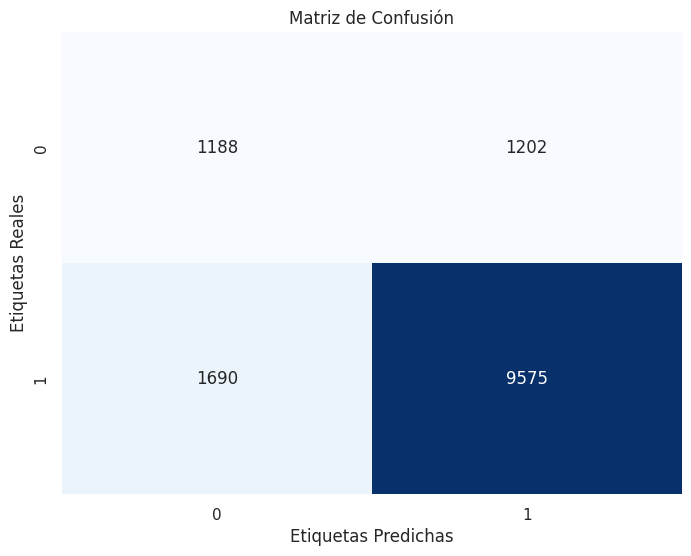

In [116]:
# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

**Observaciones**
> - **Precision:** La precisión es relativamente baja para la clase 1 (0.41), lo que indica que de las predicciones positivas para la clase 1, solo el 41% son realmente positivas. La precisión para la clase 2 es alta (0.89), lo que sugiere que las predicciones positivas para la clase 2 son más confiables.
> - **Recall:** El recall es bajo para la clase 1 (0.50), lo que significa que solo se capturan el 50% de los casos reales positivos de la clase 1. Para la clase 2, el recall es más alto (0.85), indicando que se capturan el 85% de los casos reales positivos de la clase 2.
> - **F1-score:** El F1-score, que combina precisión y recall, es más alto para la clase 2 (0.87) en comparación con la clase 1 (0.45).
> - **Accuracy:** La precisión general del modelo es del 79%, lo que indica que acierta en la clasificación del 79% de las instancias.

**Conclusiones**
> - El modelo tiene un rendimiento razonablemente bueno, especialmente para la clase 2, que tiene una mayor precisión y recall.
> - La clase 1 (etiqueta 1) parece ser más difícil de predecir, ya que tiene una precisión y recall más bajos.
> - La métrica F1-score proporciona un equilibrio entre precisión y recall y es más alta para la clase 2.
> - En general, el modelo parece ser útil, pero podrías considerar ajustar los hiperparámetros o explorar otros algoritmos para mejorar aún más el rendimiento, especialmente en la clasificación de la clase 1.
